In [129]:
# Abbrieviations
abbreviations = {
    "NoQuantizer": "NQ",
    "ClipQuantizer": "CQ",
    "HalfHadamardClipQuantizer": "HHCQ",
    "HadamardClipQuantizer": "HCQ",
    "TrustQuantizer": "TQ",
    "HalfHadamardTrustQuantizer": "HHTQ",
    "HadamardTrustQuantizer": "HTQ",
    "GaussianSTEQuantizer": "GSTEQ",
    "GaussianClipQuantizer": "GCQ",
    "GaussianTrustQuantizer": "GTQ",
    "HadamardGaussianClipQuantizer": "HGCQ",
    "HadamaardGaussianTrustQuantizer": "HGTQ",
    "FP4STEQuantizer": "FP4STEQ",
    "FP4ClipQuantizer": "FP4CQ",
    "FP4TrustQuantizer": "FP4TQ",
    "HadamardFP4ClipQuantizer": "HFP4CQ",
    "HalfHadamardFP4TrustQuantizer": "HHFP4TQ",
    "HadamardFP4TrustQuantizer": "HFP4TQ",
    "FourEightMaskedQuantizer": "48BF16",
    "FourEightSTEQuantizer": "48STEQ",
    "FourEightClipQuantizer": "48CQ",
    "FourEightTrustQuantizer": "48TQ",
    "HadamardFourEightTrustQuantizer": "H48TQ",
    "ErfClipQuantizer": "EFCQ",
    
    "PACTQuantizer": "PACT",
}

# Colors
red_color = "#D62D20"
yellow_color = "#FFA700"
blue_color = "#0057E7"
green_color = "#008744"
# red_color = "#ee4035"
# yellow_color = "#f37736"
# blue_color = "#0392cf"
# green_color = "#7bc043"

colors = {
    1: red_color,
    2: green_color,
    2.5: "mediumseagreen",
    3: blue_color,
    4: yellow_color,
    8: "purple",
    16: "black",
}
red_color = colors[1]
yellow_color = colors[4]
blue_color = colors[3]
green_color = colors[2]

# Quantizer to linestyle mapping
linestyles = {
    "NoQuantizer": '-',                       # Solid line
    "ClipQuantizer": '--',                     # Dashed line
    "HalfHadamardClipQuantizer": '-.',         # Dotted line
    "HadamardClipQuantizer": '--',             # Dash-dot line
    "TrustQuantizer": ':',                     # Dotted line
    "HalfHadamardTrustQuantizer": '-.',        # Dash-dot line
    "HadamardTrustQuantizer": ':',             # Solid line
    "GaussianSTEQuantizer": '-.',              # Dashed line
    "GaussianClipQuantizer": '--',             # Dash-dot line
    "GaussianTrustQuantizer": ':',             # Dotted line
    "HadamardGaussianClipQuantizer": '-',      # Solid line
    "HadamaardGaussianTrustQuantizer": ':',    # Dashed line
    "FP4STEQuantizer": '-.',                    # Dash-dot line
    "FP4ClipQuantizer": '--',                    # Dotted line
    "FP4TrustQuantizer": ':',                   # Solid line
    "HadamardFP4ClipQuantizer": '--',           # Dashed line
    "HalfHadamardFP4TrustQuantizer": ':',
    "HadamardFP4TrustQuantizer": ':',          # Dash-dot line
    "FourEightMaskedQuantizer": '-',            # Solid line
    "FourEightSTEQuantizer": '-.',               # Dotted line
    "FourEightClipQuantizer": '--',             # Dashed line
    "FourEightTrustQuantizer": ':',            # Dash-dot line
    "HadamardFourEightTrustQuantizer": ':',  # Custom dash pattern
    
    "PACTQuantizer": "-.",
}

# Quantizer to marker mapping
markers = {
    "NoQuantizer": 'o',                         # Circle
    "ClipQuantizer": 's',                       # Square
    "HalfHadamardClipQuantizer": 'D',           # Diamond
    "HadamardClipQuantizer": 'D',               # Diamond
    "TrustQuantizer": 's',                      # Triangle Up
    "HalfHadamardTrustQuantizer": 'D',          # Diamond
    "HadamardTrustQuantizer": 'D',              # Plus Filled
    "GaussianSTEQuantizer": 'X',                # Triangle Down
    "GaussianClipQuantizer": 'X',               # X Marker
    "GaussianTrustQuantizer": 'X',              # Hexagon
    "HadamardGaussianClipQuantizer": '+',       # Star Marker
    "HadamardGaussianTrustQuantizer": '+',     # Star Marker
    "FP4STEQuantizer": '<',                     # Tri Down Marker
    "FP4ClipQuantizer": '<',                    # Tri Up Marker
    "FP4TrustQuantizer": '<',                   # Tri Left Marker
    "HalfHadamardFP4TrustQuantizer": 'X',       # Tri Left Marker
    "HadamardFP4ClipQuantizer": '>',            # Tri Right Marker
    "HadamardFP4TrustQuantizer": '>',           # Plus Marker
    "FourEightMaskedQuantizer": 'v',            # Hexagon1 Marker
    "FourEightSTEQuantizer": 'v',               # Hexagon1 Marker
    "FourEightClipQuantizer": 'v',              # Triangle Down Marker
    "FourEightTrustQuantizer": 'v',             # Diamond Marker
    "HadamardFourEightTrustQuantizer": '^',     # Star Marker
    
    "PACTQuantizer": "+",
}


In [130]:
import json
import wandb
import numpy as np

RELOAD_RUNS = False

if RELOAD_RUNS:
    # Initialize W&B API client
    api = wandb.Api(timeout=29)

    # Fetch runs from your project
    project_runs = api.runs("ist/quest-scaling-law")

    runs_for_scaling = []

    # Iterate over runs and extract confusion matrix data
    for run in project_runs:
        # This is a placeholder; you'll need to adjust it based on how you've logged your data
        
        model_size = int(run.name.split("-")[1][:-1]) if not run.name[0].isnumeric() else int(run.name.split("-")[0][:-1])
        loss = run.summary.get('final-val/loss')
        quant = run.config.get("w_quant")
        w_quant_arg = run.config.get("w_quant_kwargs")
        a_quant_arg = run.config.get("a_quant_kwargs")
        dataset = run.config.get("dataset")
        lr = run.config.get("lr")
        
        if loss is not None and dataset is not None and dataset == "c4":
            tokens = run.config["iterations"] * run.config["batch_size"] * run.config["sequence_length"] * run.config["acc_steps"] * run.config["world_size"]
            non_embedding_parameters = run.summary["non_embedding_parameters"]
            
            runs_for_scaling.append({
                'model_size': model_size,
                'non_embedding_parameters': non_embedding_parameters,
                'w_bits': w_quant_arg.get('bits') if w_quant_arg is not None else 16,
                'a_bits': a_quant_arg.get('bits') if a_quant_arg is not None else 16,
                'loss': loss,
                'tokens': tokens,
                'bops': non_embedding_parameters * tokens,
                'w_quant': quant,
                'a_quant': run.config["a_quant"],
                'trust': w_quant_arg.get("trust") if w_quant_arg is not None else None,
                'p': w_quant_arg.get("p") if w_quant_arg is not None else None,
                'clip_scale': w_quant_arg.get("clip_scale") if w_quant_arg is not None else None,
                'args': run.config,
            })
            
    with open("../for_plots/runs_for_scaling.json", "w") as f:
        json.dump(runs_for_scaling, f)
else:
    with open("../for_plots/runs_for_scaling.json", "r") as f:
        runs_for_scaling = json.load(f)


In [131]:
runs_base_quest = [
    {
        "L": run["loss"],
        "N": run["non_embedding_parameters"],
        "P": run["w_bits"],
        "D": run["tokens"],
        "C": run["bops"],
    } 
    for run in runs_for_scaling if (
        run['w_quant'] == run['a_quant'] and
        "Hadamard" in run['w_quant'] and
        "FP4" not in run['w_quant']
    )
]
assert len(runs_base_quest) == 6 + 12 + 13 + 14 + 3

runs_sparsity = [
    {
        "L": run["loss"],
        "N": run["non_embedding_parameters"],
        "P": 2.50,
        "D": run["tokens"],
        "C": run["bops"],
    }
    for run in runs_for_scaling if (
        "FourEight" in run['w_quant']
    )
]
assert len(runs_sparsity) == 6

runs_fp4 = [
    {
        "L": run["loss"],
        "N": run["non_embedding_parameters"],
        "P": "fp4",
        "D": run["tokens"],
        "C": run["bops"],
    }
    for run in runs_for_scaling if (
        "FP4" in run['w_quant']
    )
]
assert len(runs_fp4) == 4

runs_no_hadamard = [
    {
        "L": run["loss"],
        "N": run["non_embedding_parameters"],
        "P": f"{run['w_bits']}NOH",
        "D": run["tokens"],
        "C": run["bops"],
    }
    for run in runs_for_scaling if (
        run['w_quant'] == run['a_quant'] and
        "Hadamard" not in run['w_quant'] and
        run['w_quant'] != "NoQuantizer"
    )
]
assert len(runs_no_hadamard) == 24

runs_weight_only = [
    {
        "L": run["loss"],
        "N": run["non_embedding_parameters"],
        "P": f"{run['w_bits']}WO",
        "D": run["tokens"],
        "C": run["bops"],
    }
    for run in runs_for_scaling if (
        "Hadamard" in run['w_quant'] and run['a_quant'] == "NoQuantizer"
    )
]
assert len(runs_weight_only) == 16

runs_bf16 = [
    {
        "L": run["loss"],
        "N": run["non_embedding_parameters"],
        "P": 16,
        "D": run["tokens"],
        "C": run["bops"],
    }
    for run in runs_for_scaling if (
        run['w_quant'] == run['a_quant'] and
        run['w_quant'] == "NoQuantizer"
    )
]
assert len(runs_bf16) == 6

runs_for_fit = runs_base_quest + runs_sparsity + runs_fp4 + runs_no_hadamard + runs_weight_only + runs_bf16

assert len(runs_for_fit) == len(runs_for_scaling)


class DotDict(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(f"'DotDict' object has no attribute '{key}'")

    def __setattr__(self, key, value):
        self[key] = value

In [132]:
REFIT = False

import numpy as np
from scipy.optimize import least_squares

from tqdm.auto import tqdm

# Example data
data = runs_for_fit

def model(params, N, D, P):
    """
    Given parameter vector and one data point (N, D, P),
    return the predicted L.
    """
    # Unpack parameters
    a, alpha, b, beta, e, \
    eff1, eff2, eff3, eff4, eff8, \
    effnoh1, effnoh1585, effnoh2, effnoh3, effnoh4, effnoh8, \
    effwo1, effwo2, effwo3, effwo4, \
    eff48, efffp4 = params
    
    # Define eff(16) = 1.0 (fixed)
    def eff(p):
        if p == 1: return eff1
        elif p == 2: return eff2
        elif p == 2.5: return eff48
        elif p == 3: return eff3
        elif p == 4: return eff4
        elif p == 8: return eff8
        elif p == 16: return 1.0
        elif p == "fp4": return efffp4
        elif p == "1NOH": return effnoh1
        elif p == "1.585NOH": return effnoh1585
        elif p == "2NOH": return effnoh2
        elif p == "3NOH": return effnoh3
        elif p == "4NOH": return effnoh4
        elif p == "8NOH": return effnoh8
        elif p == "1WO": return effwo1
        elif p == "2WO": return effwo2
        elif p == "3WO": return effwo3
        elif p == "4WO": return effwo4
        else:
            raise ValueError(f"Unknown p: {p}")

    # The scaling law:
    #   L(N, D, P) = A / [ (N * eff(P))^alpha ] + B / [ D^beta ] + E
    return (np.exp(a) / ((N * eff(P)) ** alpha)) + (np.exp(b) / (D ** beta)) + np.exp(e)

def log_residuals(params, data):
    """
    Residuals in log-space: log(L_i) - log(model_prediction).
    We'll apply a robust loss (Huber) to these via least_squares(..., loss='huber').
    """
    residual_list = []
    for point in data:
        # Avoid numerical issues: ensure model(...) > 0 before log
        L_model = model(params, point['N'], point['D'], point['P'])
        if L_model <= 0:
            # If the model predicts a non-positive value, penalize it heavily
            r = 1
        else:
            r = (np.log(point['L']) - np.log(L_model)) * 1e-3
        residual_list.append(r)
    return np.array(residual_list)

a_grid = [5, 10, 15, 20, 25]
alpha_grid = [0.0, 0.5, 1.0]
b_grid = [5, 10, 15, 20, 25]
beta_grid = [0.0, 0.5, 1.0]
e_grid = [-1, -0.5, 0.0, 0.5, 1.0]

best_result = None
best_cost = np.inf

if REFIT:
    for a0 in tqdm(a_grid, desc="a0"):
        for alpha0 in tqdm(alpha_grid, leave=False, desc="alpha0"):
            for b0 in tqdm(b_grid, leave=False, desc="b0"):
                for beta0 in beta_grid:
                    for e0 in e_grid:
                        
                        initial_guess = [a0, alpha0, b0, beta0, e0,
                                         0.1, 0.3, 0.5, 0.8, 0.9,
                                         0.1, 0.2, 0.3, 0.5, 0.8, 0.9,
                                         0.5, 0.6, 0.7, 0.8,
                                         0.3, 0.5]
                        
                        result = least_squares(
                            fun=log_residuals,
                            x0=initial_guess,
                            args=(data,),
                            loss='huber',
                            f_scale=1.0
                        )
                        
                        if result.cost < best_cost:
                            best_cost = result.cost
                        best_result = result

    a_fit, alpha_fit, b_fit, beta_fit, e_fit, \
    eff1_fit, eff2_fit, eff3_fit, eff4_fit, eff8_fit, \
    effnoh1_fit, effnoh1585_fit, effnoh2_fit, effnoh3_fit, effnoh4_fit, effnoh8_fit, \
    effwo1_fit, effwo2_fit, effwo3_fit, effwo4_fit, \
    eff48_fit, efffp4_fit = best_result.x
else:
    best_result = DotDict({"x": [ 2.09605662e+00,  6.27265220e-02,  4.45912547e+00,  2.41288351e-01,
       -6.55478434e+00,  2.05046859e-02,  1.51870911e-01,  4.33126203e-01,
        6.91831718e-01,  1.01619263e+00,  1.55770373e-02,  2.46499090e+01,
        7.84119072e-02,  3.22107861e-01,  6.03270679e-01,  9.37628722e-01,
        1.38419575e-01,  4.13717453e-01,  6.53058816e-01,  8.40434222e-01,
        3.81222089e-01,  6.29639028e-01], "cost": 7.38431448432692e-10})
    a_fit, alpha_fit, b_fit, beta_fit, e_fit, \
    eff1_fit, eff2_fit, eff3_fit, eff4_fit, eff8_fit, \
    effnoh1_fit, effnoh1585_fit, effnoh2_fit, effnoh3_fit, effnoh4_fit, effnoh8_fit, \
    effwo1_fit, effwo2_fit, effwo3_fit, effwo4_fit, \
    eff48_fit, efffp4_fit = best_result.x

A_fit = np.exp(a_fit)
B_fit = np.exp(b_fit)

print("Best fitted parameters (via log-residual + Huber) from the sweep:")
print(f"  A       = {A_fit}")
print(f"  alpha   = {alpha_fit}")
print(f"  B       = {B_fit}")
print(f"  beta    = {beta_fit}")
print(f"  E       = {np.exp(e_fit)}")
print(f"  eff(1)  = {eff1_fit}")
print(f"  eff(2)  = {eff2_fit}")
print(f"  eff(3)  = {eff3_fit}")
print(f"  eff(4)  = {eff4_fit}")
print(f"  eff(8)  = {eff8_fit}")
print(f"  eff(fp4)= {efffp4_fit}")
print(f"  eff(2.5)= {eff48_fit}")
print(f"  eff(1NOH)  = {effnoh1_fit}")
print(f"  eff(2NOH)  = {effnoh2_fit}")
print(f"  eff(3NOH)  = {effnoh3_fit}")
print(f"  eff(4NOH)  = {effnoh4_fit}")
print(f"  eff(8NOH)  = {effnoh8_fit}")
print(f"  eff(1WO)  = {effwo1_fit}")
print(f"  eff(2WO)  = {effwo2_fit}")
print(f"  eff(3WO)  = {effwo3_fit}")
print(f"  eff(4WO)  = {effwo4_fit}")
print("  eff(16) = 1.0 (fixed)")
print("-" * 40)
print("Lowest loss: ", best_result.cost)


Best fitted parameters (via log-residual + Huber) from the sweep:
  A       = 8.134031011055859
  alpha   = 0.062726522
  B       = 86.41190623830154
  beta    = 0.241288351
  E       = 0.0014232897805828435
  eff(1)  = 0.0205046859
  eff(2)  = 0.151870911
  eff(3)  = 0.433126203
  eff(4)  = 0.691831718
  eff(8)  = 1.01619263
  eff(fp4)= 0.629639028
  eff(2.5)= 0.381222089
  eff(1NOH)  = 0.0155770373
  eff(2NOH)  = 0.0784119072
  eff(3NOH)  = 0.322107861
  eff(4NOH)  = 0.603270679
  eff(8NOH)  = 0.937628722
  eff(1WO)  = 0.138419575
  eff(2WO)  = 0.413717453
  eff(3WO)  = 0.653058816
  eff(4WO)  = 0.840434222
  eff(16) = 1.0 (fixed)
----------------------------------------
Lowest loss:  7.38431448432692e-10


In [133]:
main_sequence_runs = [run for run in runs_for_scaling if abs(run['tokens'] / run['non_embedding_parameters']  - 100) < 10]
len(main_sequence_runs)

80

In [134]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams['font.family'] = "Times New Roman"
LABEL_SIZE = 16
plt.rcParams['axes.labelsize'] = LABEL_SIZE
LEGEND_SIZE = 16
plt.rcParams['legend.fontsize'] = LEGEND_SIZE
AXIS_LABEL_SIZE = 12
plt.rcParams['xtick.labelsize'] = AXIS_LABEL_SIZE  # Set x-axis tick label size
plt.rcParams['ytick.labelsize'] = AXIS_LABEL_SIZE  # Set y-axis tick label size

def plot_quantizer(runs, w_bits, w_quantizer, a_bits=None, a_quantizer=None, alpha=1, extra_filter=lambda run: True, bits_fn=lambda bits: bits, label=None,
                   plot_kwargs=None, draw_scaling_law=False, ax=None):
    if ax is None:
        ax = plt.gca()
    
    if a_quantizer is None:
        a_quantizer = w_quantizer
    if a_bits is None:
        a_bits = w_bits
        
    filtered_runs = [
        run for run in runs if 
        run['w_bits'] == w_bits and 
        (run['w_quant'] == w_quantizer or run['w_quant'] == "Half" + w_quantizer) and
        (run['a_quant'] == a_quantizer or run['a_quant'] == "Half" + a_quantizer) and 
        extra_filter(run)
    ]
    
    if a_quantizer != "NoQuantizer":
        filtered_runs = [
            run for run in filtered_runs if 
            run['a_bits'] == a_bits
        ]
        
    losses = {run['non_embedding_parameters'] * 1e-6 * bits_fn(w_bits): run['loss'] for run in filtered_runs}
    data = [x for _, x in sorted(losses.items())]
    memory = sorted(losses.keys())
    
    updated_plot_kwargs = {
        "label": f"{abbreviations[w_quantizer]}@{w_bits}bit" if label is None else label,
        "color": colors[w_bits],
        "marker": markers[w_quantizer],
        "alpha": alpha,
        "linestyle": linestyles[w_quantizer],
    }
    if plot_kwargs is not None:
        updated_plot_kwargs.update(plot_kwargs)
    
    if draw_scaling_law:
        model_sizes = sorted([run['non_embedding_parameters'] * 1e-6 for run in filtered_runs])
        sizes_grid = np.linspace(min(model_sizes), max(max(model_sizes), min(model_sizes) * 2), 50)
        
        if w_quantizer == "HalfHadamardFP4TrustQuantizer":
            precision = "fp4"
        elif w_quantizer == "TrustQuantizer" or w_quantizer == "ClipQuantizer":
            precision = f"{bits_fn(w_bits)}NOH"
        elif a_quantizer == "NoQuantizer":
            precision = f"{bits_fn(w_bits)}WO"
        else:
            precision = bits_fn(w_bits)
        
        ax.plot(
            [n * bits_fn(w_bits) for n in sizes_grid],
            [model(
                best_result.x, n * 1e6, n * 1e8, 
                precision,
            ) for n in sizes_grid],
            color=updated_plot_kwargs['color'], linestyle=updated_plot_kwargs['linestyle'], alpha=alpha, marker=None
        )
        
        del updated_plot_kwargs['linestyle']
        ax.scatter(memory, data, **updated_plot_kwargs)
    else:
        ax.plot(memory, data, **updated_plot_kwargs)
    

def plot_bf16(runs, draw_scaling_law=False, ax=None):
    if ax is None:
        ax = plt.gca()
    losses = [run['loss'] for run in runs if run['w_quant'] == "NoQuantizer" and run['a_quant'] == "NoQuantizer"]
    memory = [run['non_embedding_parameters'] * 1e-6 * 16 for run in runs if run['w_quant'] == "NoQuantizer" and run['a_quant'] == "NoQuantizer"]
    data = [x for _, x in sorted(zip(memory, losses))]
    memory = sorted(memory)
    if draw_scaling_law:
        ax.scatter(memory, data, label=f"BF16", color=colors[16], marker=markers["NoQuantizer"])
        model_sizes = sorted([run['model_size'] for run in runs])
        sizes_grid = np.linspace(min(model_sizes), max(max(model_sizes), min(model_sizes) * 2), 50)
        ax.plot(
            [n * 16 for n in sizes_grid],
            [model(best_result.x, n * 1e6, n * 1e8, 16) for n in sizes_grid],
            color=colors[16], linestyle=linestyles["NoQuantizer"]
        )
    else:
        ax.plot(memory, data, label=f"BF16", color=colors[16], linestyle=linestyles["NoQuantizer"], marker=markers["NoQuantizer"])
    
def set_scaling_law_bounds(
    xlim=(25, 10000),
    ylim=(2.5, 4.3),
    xlabel="Memory, Mbit",
    ylabel="C4 Val Loss",
    ax=None,
):
    if ax is None:
        ax = plt.gca()
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

    ax.set_xscale("log")
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.legend(fontsize=None)

# Main Plot

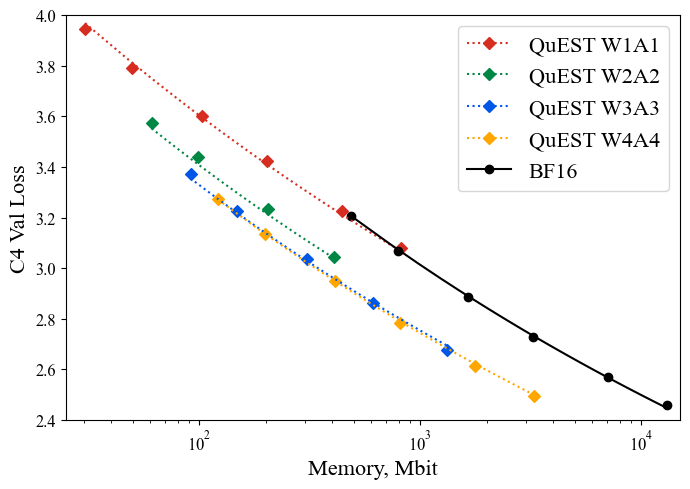

In [135]:
plt.figure(figsize=(7, 5))
plot_quantizer(main_sequence_runs, 1, "HadamardClipQuantizer", extra_filter=lambda run: run['clip_scale'] == 1.30,
               plot_kwargs={"label": "QuEST W1A1", "linestyle": linestyles["HadamardTrustQuantizer"]}, draw_scaling_law=True)

for i, bits in enumerate([2, 3, 4]):
    plot_quantizer(main_sequence_runs, bits, "HadamardTrustQuantizer", extra_filter=lambda run: run['trust'] is None, plot_kwargs={"label": f"QuEST W{bits}A{bits}"}, draw_scaling_law=True)
    
    
# plot_quantizer(main_sequence_runs, 3, "PACTQuantizer", 3, "PACTQuantizer", plot_kwargs={"label": f"PACT W3A3"})
# plot_quantizer(main_sequence_runs, 4, "PACTQuantizer", 4, "PACTQuantizer", plot_kwargs={"label": f"PACT W4A4"})
    
plot_bf16(main_sequence_runs, draw_scaling_law=True)
# set_scaling_law_bounds(xlim=(25, 5000), ylim=(2.55, 4.0), legend_fontsize=12)
set_scaling_law_bounds(xlim=(25, 1.5e4), ylim=(2.4, 4.0))


plt.legend(handles=[
    mlines.Line2D(
        [], [], 
        color=colors[bits],
        marker=markers["HadamardTrustQuantizer"],
        linestyle=linestyles["HadamardTrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"QuEST W{bits}A{bits}",
    ) for bits in [1, 2, 3, 4]
] + [
    mlines.Line2D(
        [], [], 
        color=colors[16],
        marker=markers["NoQuantizer"],
        linestyle=linestyles["NoQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"BF16",
    )
])

plt.tight_layout()
plt.savefig("../figures/main.pdf", bbox_inches='tight')
plt.show()

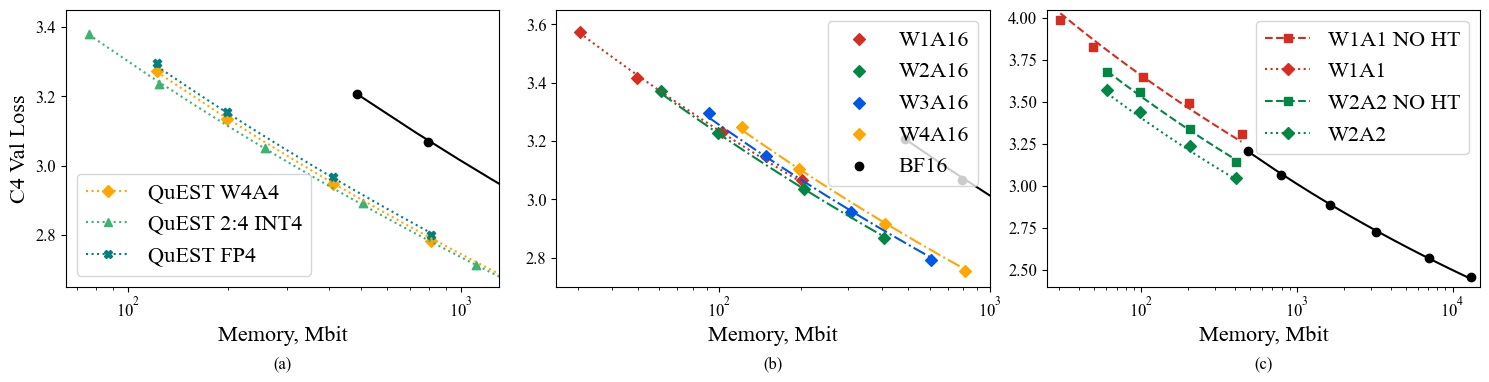

In [136]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

# HadamardFourEightTrustQuantizer
ax = axs[0]

plot_quantizer(main_sequence_runs, 4, "HadamardTrustQuantizer", 4, "HadamardTrustQuantizer", 
               ax=ax, plot_kwargs={"label": "W4A4"}, draw_scaling_law=True)
plot_quantizer(main_sequence_runs, 4, "HadamardFourEightTrustQuantizer", 4, "HadamardTrustQuantizer", 
               bits_fn=lambda bits: (bits / 2 + 0.5), ax=ax, plot_kwargs={"label": "2:4 Int4", "color": colors[2.5]}, draw_scaling_law=True)
plot_quantizer(main_sequence_runs, 16, "HalfHadamardFP4TrustQuantizer", 16, "HalfHadamardFP4TrustQuantizer", 
               ax=ax, bits_fn=lambda _: 4, plot_kwargs={"label": "FP4", "color": "teal"}, draw_scaling_law=True)
    
plot_bf16(main_sequence_runs, ax=ax, draw_scaling_law=True)
set_scaling_law_bounds(xlim=(65, 1300), ylim=(2.65, 3.45), ax=ax)
ax.legend(handles=[
    mlines.Line2D(
        [], [], 
        color=colors[4],
        marker=markers["HadamardTrustQuantizer"],
        linestyle=linestyles["HadamardTrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"QuEST W4A4",
    ),
    mlines.Line2D(
        [], [], 
        color=colors[2.5],
        marker=markers["HadamardFourEightTrustQuantizer"],
        linestyle=linestyles["HadamardFourEightTrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"QuEST 2:4 INT4",
    ),
    mlines.Line2D(
        [], [], 
        color="teal",
        marker=markers["HalfHadamardFP4TrustQuantizer"],
        linestyle=linestyles["HalfHadamardFP4TrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"QuEST FP4",
    ),
])


# Weight-only
ax = axs[1]

plot_quantizer(main_sequence_runs, 1, "HalfHadamardClipQuantizer", None, "NoQuantizer", extra_filter=lambda run: run['clip_scale'] == 1.30,
               plot_kwargs={"linestyle": linestyles["TrustQuantizer"], "label": "W1A16"}, ax=ax, draw_scaling_law=True)

for i, bits in enumerate([2, 3, 4]):
    plot_quantizer(main_sequence_runs, bits, "HalfHadamardTrustQuantizer", None, "NoQuantizer",
                   plot_kwargs={"label": f"W{bits}A16"}, ax=ax, draw_scaling_law=True)
    
# plot_quantizer(main_sequence_runs, 4, "PACTQuantizer", None, "NoQuantizer", plot_kwargs={"label": f"PACT W4A16"}, ax=ax)
# plot_quantizer(main_sequence_runs, 3, "PACTQuantizer", None, "NoQuantizer", plot_kwargs={"label": f"PACT W3A16"}, ax=ax)
    
plot_bf16(main_sequence_runs, ax=ax, draw_scaling_law=True)
set_scaling_law_bounds(xlim=(25, 1000), ylim=(2.7, 3.65), ylabel=None, ax=ax)

# TrustQuantzier
ax = axs[2]

plot_quantizer(main_sequence_runs, 1, "ClipQuantizer", extra_filter=lambda run: run['clip_scale'] == 1.25,
               plot_kwargs={"linestyle": "--", "label": "W1A1 NO HT"}, ax=ax, draw_scaling_law=True)
# plot_quantizer(main_sequence_runs, 1, "HadamardClipQuantizer", extra_filter=lambda run: run['clip_scale'] == 1.30,
#                plot_kwargs={"linestyle": linestyles["HadamardTrustQuantizer"], "label": "W1A1"}, ax=ax, draw_scaling_law=True)

for i, bits in enumerate([2]):
    plot_quantizer(main_sequence_runs, bits, "TrustQuantizer", extra_filter=lambda run: run['trust'] is None, 
                   plot_kwargs={"linestyle": "--", "label": f"W{bits}A{bits} NO HT"}, ax=ax, draw_scaling_law=True)
    plot_quantizer(main_sequence_runs, bits, "HadamardTrustQuantizer", extra_filter=lambda run: run['trust'] is None,
                   plot_kwargs={"label": f"W{bits}A{bits}"}, ax=ax, draw_scaling_law=True)
    
plot_bf16(main_sequence_runs, ax=ax, draw_scaling_law=True)
set_scaling_law_bounds(xlim=(25, 1.5e4), ylim=(2.4, 4.05), ylabel=None, ax=ax)

handles = [
    mlines.Line2D(
        [], [], 
        color=colors[bits],
        marker=markers["HadamardTrustQuantizer"],
        linestyle=linestyles["HadamardTrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"W{bits}A{bits}",
    ) for bits in [1, 2]
] + [
    mlines.Line2D(
        [], [], 
        color=colors[bits],
        marker=markers["TrustQuantizer"],
        linestyle="--",
        markersize=6,   # adjust as you prefer
        label=f"W{bits}A{bits} NO HT",
    ) for bits in [1, 2]
]
handles = [handles[i] for i in [2, 0, 3, 1]]
plt.legend(handles=handles)

# a b c
labels = ['(a)', '(b)', '(c)']
for ax, label in zip(axs, labels):
    ax.annotate(label, 
                xy=(0.5, -0.25),     # x=0.5 (center), y=-0.25 (below the x-axis)
                xycoords='axes fraction',
                ha='center', 
                va='top', 
                fontsize=12)


# SAVE
fig.tight_layout()
fig.savefig("../figures/extra.pdf", bbox_inches='tight')

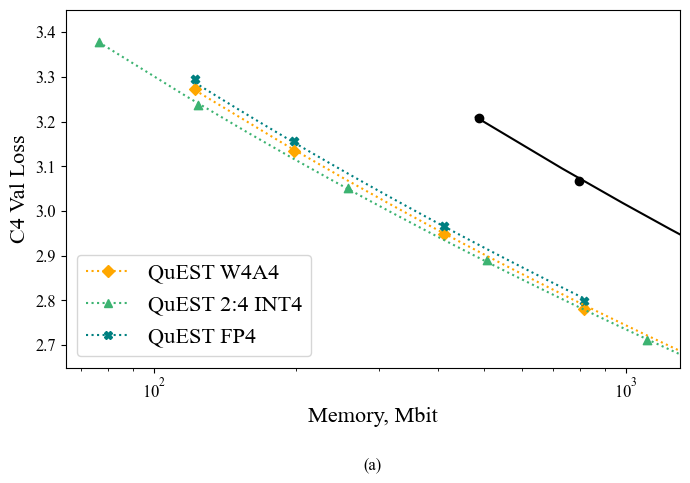

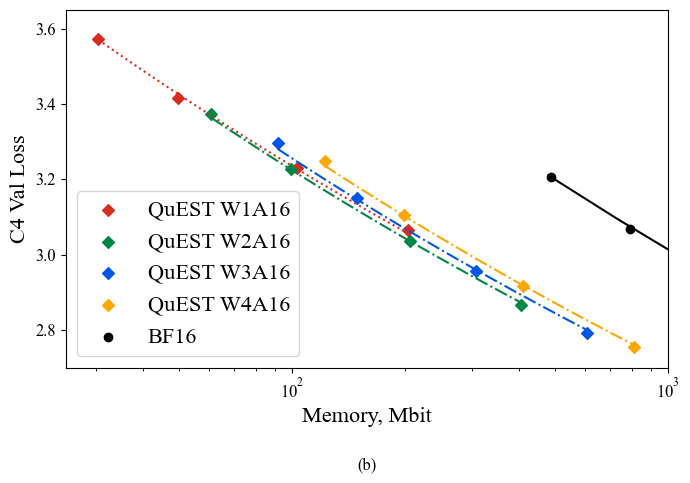

In [137]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# -------------------------------
# Plot 1: HadamardFourEightTrustQuantizer
# -------------------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))

plot_quantizer(main_sequence_runs, 4, "HadamardTrustQuantizer", 4, "HadamardTrustQuantizer", 
               ax=ax1, plot_kwargs={"label": "W4A4"}, draw_scaling_law=True)
plot_quantizer(main_sequence_runs, 4, "HadamardFourEightTrustQuantizer", 4, "HadamardTrustQuantizer", 
               bits_fn=lambda bits: (bits / 2 + 0.5), ax=ax1, plot_kwargs={"label": "2:4 Int4", "color": colors[2.5]}, draw_scaling_law=True)
plot_quantizer(main_sequence_runs, 16, "HalfHadamardFP4TrustQuantizer", 16, "HalfHadamardFP4TrustQuantizer", 
               ax=ax1, bits_fn=lambda _: 4, plot_kwargs={"label": "FP4", "color": "teal"}, draw_scaling_law=True)
    
plot_bf16(main_sequence_runs, ax=ax1, draw_scaling_law=True)
set_scaling_law_bounds(xlim=(65, 1300), ylim=(2.65, 3.45), ax=ax1)

ax1.legend(handles=[
    mlines.Line2D(
        [], [], 
        color=colors[4],
        marker=markers["HadamardTrustQuantizer"],
        linestyle=linestyles["HadamardTrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"QuEST W4A4",
    ),
    mlines.Line2D(
        [], [], 
        color=colors[2.5],
        marker=markers["HadamardFourEightTrustQuantizer"],
        linestyle=linestyles["HadamardFourEightTrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"QuEST 2:4 INT4",
    ),
    mlines.Line2D(
        [], [], 
        color="teal",
        marker=markers["HalfHadamardFP4TrustQuantizer"],
        linestyle=linestyles["HalfHadamardFP4TrustQuantizer"],
        markersize=6,   # adjust as you prefer
        label=f"QuEST FP4",
    ),
])

# Add annotation for identification
ax1.annotate('(a)', xy=(0.5, -0.25), xycoords='axes fraction',
             ha='center', va='top', fontsize=12)

fig1.tight_layout()
fig1.savefig("../figures/extra1.pdf", bbox_inches='tight')


# -------------------------------
# Plot 2: Weight-only
# -------------------------------
fig2, ax2 = plt.subplots(figsize=(7, 5))

plot_quantizer(main_sequence_runs, 1, "HalfHadamardClipQuantizer", None, "NoQuantizer", 
               extra_filter=lambda run: run['clip_scale'] == 1.30,
               plot_kwargs={"linestyle": linestyles["TrustQuantizer"], "label": "QuEST W1A16"}, 
               ax=ax2, draw_scaling_law=True)

for bits in [2, 3, 4]:
    plot_quantizer(main_sequence_runs, bits, "HalfHadamardTrustQuantizer", None, "NoQuantizer",
                   plot_kwargs={"label": f"QuEST W{bits}A16"}, ax=ax2, draw_scaling_law=True)
    
plot_bf16(main_sequence_runs, ax=ax2, draw_scaling_law=True)
set_scaling_law_bounds(xlim=(25, 1000), ylim=(2.7, 3.65), ax=ax2)

# Add annotation for identification
ax2.annotate('(b)', xy=(0.5, -0.25), xycoords='axes fraction',
             ha='center', va='top', fontsize=12)

fig2.tight_layout()
fig2.savefig("../figures/extra2.pdf", bbox_inches='tight')


In [164]:
results_dict = {
    "30M": {
        "STE": {
            8: 3.22211,
            7: 3.23947,
            6: 3.33563,
            5: 3.52184,
            4: 3.792,
            3: 4.449,
            2: 4.793,
            1: 5.256,
        },
        "LSQ": {
            8: 3.23049,
            7: 3.23643,
            6: 3.24339,
            5: 3.2653,
            4: 3.31,
            3: 3.41,
            2: 3.60,
            1: 3.99,
        },
        "QuEST": {
            8: 3.20891,
            7: 3.21074,
            6: 3.21772,
            5: 3.23158,
            4: 3.27212,
            3: 3.37191,
            2: 3.57404,
            1: 3.9449,
        },
        "QuaRot": {
            4: 3.338,
            3: 3.612,
            2: 4.481,
            1: 4.932,
        },
        "AO": {
            4: 3.658,
            3: 4.181,
            2: 4.549,
            1: 5.004,
        }
    },
     "50M": {
        "STE": {
            4: 4.040,
            3: 4.542,
            2: 5.162,
            1: 6.867,
        },
        "LSQ": {
            4: 3.24,
            3: 3.29,
            2: 3.49,
            1: 3.86,
        },
        "QuEST": {
            4: 3.135,
            3: 3.226,
            2: 3.441,
            1: 3.791,
        },
        "QuaRot": {
            4: 3.201,
            3: 3.695,
            2: 4.566,
            1: 5.007,
        },
        "AO": {
            4: 3.733,
            3: 4.315,
            2: 4.601,
            1: 4.985,
        },
    }
}

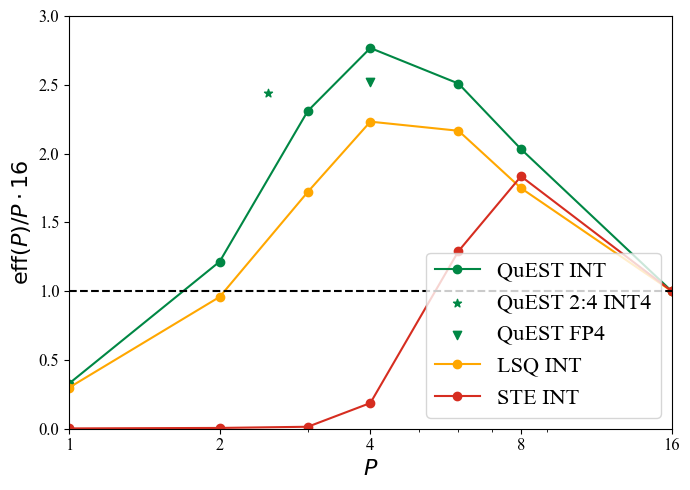

In [ ]:
def fit_from_single_loss(loss, N=30482560, bf16_loss=3.2071399688720703):
    return (1 + N**alpha_fit / A_fit * (loss - bf16_loss)) ** (-1/alpha_fit)

efficiencies_linear = efficiencies_linear = {
    1: float(eff1_fit * 16 / 1),
    2: float(eff2_fit * 16 / 2),
    3: float(eff3_fit * 16 / 3),
    4: float(eff4_fit * 16 / 4),
    8: float(eff8_fit * 16 / 8),
    16: 1,
} | {6: fit_from_single_loss(3.21772) * 16 / 6}

efficiencies_lsq = {
    key: fit_from_single_loss(value) * 16 / key
    for key, value in results_dict["30M"]["LSQ"].items() if key in [1, 2, 3, 4, 6, 8]
} | {0:0, 16: 1}

efficiencies_ste = {
    key: fit_from_single_loss(value) * 16 / key
    for key, value in results_dict["30M"]["STE"].items() if key in [1, 2, 3, 4, 6, 8]
} | {0:0, 16: 1}

# QuEST INT
plt.figure(figsize=(7, 5))
bits = sorted(efficiencies_linear.keys())
values = [efficiencies_linear[bit] for bit in bits]
max_quest = max(values)
plt.plot(bits, values, marker="o", label=r"QuEST INT", color=green_color)
# plt.axhline(max_quest, color=green_color, linestyle="--")

# bits = efficiencies_wo.keys()
# values = [efficiencies_wo[bit] for bit in bits]
# plt.plot(bits, values, marker="^", label=r"QuEST WO", color="orange")

plt.scatter([2.5], [eff48_fit / 2.5 * 16], marker="*", label="QuEST 2:4 INT4", color=green_color)
plt.scatter([4], [efffp4_fit / 4 * 16], marker="v", label="QuEST FP4", color=green_color)

# LSQ INT
bits = sorted(efficiencies_lsq.keys())
values = [efficiencies_lsq[bit] for bit in bits]
max_lsq = max(values)
plt.plot(bits, values, marker="o", label=r"LSQ INT", color=yellow_color)
# plt.axhline(max_lsq, color=yellow_color, linestyle="--")

# STE INT
bits = sorted(efficiencies_ste.keys())
values = [efficiencies_ste[bit] for bit in bits]
max_ste = max(values)
plt.plot(bits, values, marker="o", label=r"STE INT", color=red_color)
# plt.axhline(max_ste, color=red_color, linestyle="--")

# Annotate HERE
# plt.annotate(">We find this P* to be around 7-8 bits\nKumar et al.", 
#              xy=(7, 1.5), 
#              xytext=(7, 1.5),
#              ha='center',
#              va='center',
#              bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.axhline(1, color="black", linestyle="--")

# Add vertical arrows and annotations
# x_pos = 1.2
# # Arrow from 1.0 to STE
# plt.annotate(f"", xy=(x_pos, max_ste), xytext=(x_pos, 1),
#              arrowprops=dict(arrowstyle="->", color="black"),
#              ha='left', va='center')
# plt.annotate(f"+{max_ste-1:.2f}", xy=(x_pos, max_ste), xytext=(x_pos + 0.05, (1 + max_ste)/2),
#              ha='left', va='center')

# # Arrow from STE to LSQ
# plt.annotate(f"", xy=(x_pos, max_lsq), xytext=(x_pos, max_ste),
#              arrowprops=dict(arrowstyle="->", color="black"),
#              ha='left', va='center')
# plt.annotate(f"+{max_lsq-max_ste:.2f}", xy=(x_pos, max_lsq), xytext=(x_pos + 0.05, (max_lsq+max_ste)/2),
#              ha='left', va='center')

# # Arrow from LSQ to QuEST
# plt.annotate(f"", xy=(x_pos, max_quest), xytext=(x_pos, max_lsq),
#              arrowprops=dict(arrowstyle="->", color="black"),
#              ha='left', va='center')
# plt.annotate(f"+{max_quest-max_lsq:.2f}", xy=(x_pos, max_quest), xytext=(x_pos + 0.05, (max_quest+max_lsq)/2),
#              ha='left', va='center')

plt.xscale("log")

plt.xlabel("$P$")
plt.ylabel(r"$\text{eff}(P)/P \cdot 16$")
plt.ylim(0, 3)
plt.xlim(1, 16)

ticks = [1, 2, 4, 8, 16]
plt.xticks(ticks, ticks)

plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../figures/efficiencies.pdf", bbox_inches='tight')

In [141]:
grid_mses = {1: np.float64(0.3633802276324186),
 2: np.float64(0.11884605038769407),
 3: np.float64(0.03743965939152373),
 4: np.float64(0.011542884500323213),
 8: np.float64(8.782117814336654e-05),
}

fp4_mse = np.float64(0.012684904138719949)

eff_fits = {
    1: eff1_fit,
    2: eff2_fit,
    3: eff3_fit,
    4: eff4_fit,
    8: eff8_fit,
}

wo_grid_mses = {
    1: np.float64(0.3633802276324186),
    2: np.float64(0.11884605038769407),
    3: np.float64(0.03743965939152373),
    4: np.float64(0.011542884500323213),
}

wo_eff_fits = {
    1: effwo1_fit,
    2: effwo2_fit,
    3: effwo3_fit,
    4: effwo4_fit,
}


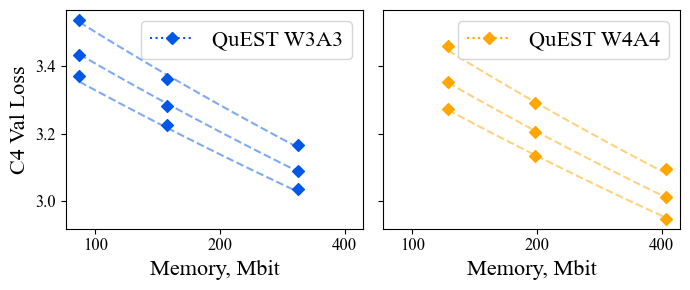

In [142]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FixedLocator, FixedFormatter, NullLocator

##############################################################################
# 3) Define a function that returns eff(p) and the model(N,D,P)
##############################################################################
def eff(p):
    if p == 1:  return eff1_fit
    if p == 2:  return eff2_fit
    if p == 3:  return eff3_fit
    if p == 4:  return eff4_fit
    if p == 16: return 1.0
    raise NotImplementedError(f"No efficiency fit for {p}")

##############################################################################
# 4) Group by P, plot L vs. (N*P), and overlay a fitted curve for each group
##############################################################################
# (a) Group data by P
groups = {}
grpup_to_subplot = {3.0: 0, 4.0: 1}
for pt in runs_for_fit:
    p_val = pt["P"]
    if p_val not in grpup_to_subplot:
        continue
    if pt["N"] > 110e6:
        continue
    
    if p_val not in groups:
        groups[p_val] = []
    groups[p_val].append(pt)

# (b) Plot
# Removed the redundant plt.figure(figsize=(7, 5)) since plt.subplots is used below

fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharey=True, sharex=True)

for computex in (25, 50, 100):
    for p_val, pts in sorted(groups.items()):
        ax = axs[grpup_to_subplot[p_val]]

        # X = N * P, Y = L
        x_vals = [p["N"] * p_val * 1e-6 for p in pts if abs(p['D'] / p['N'] - computex) < 10]
        y_vals = [p["L"] for p in pts if abs(p['D'] / p['N'] - computex) < 10]

        # Scatter the actual data
        marker = markers["HadamardTrustQuantizer"]

        label = None
        if p_val == 2.5:
            marker = markers["HadamardFourEightTrustQuantizer"]
            if computex == 100:
                label = "QuEST 2:4"
        else:
            marker = markers["HadamardTrustQuantizer"]
            if computex == 100:
                label = f"QuEST W{p_val}A{p_val}"

        ax.scatter(
            x_vals,
            y_vals,
            color=colors[p_val if p_val != 2.5 else 4.0],
            label=label,
            marker=marker
        )

        # Interpolate a smooth curve over N in [min, max] for that group
        N_min = min(p["N"] for p in pts)
        N_max = max(p["N"] for p in pts)
        N_grid = np.linspace(N_min, max(N_max, N_min * 2), 50)

        # We'll keep P fixed to the group's P
        x_curve = [n * p_val * 1e-6 for n in N_grid]
        y_curve = [model(best_result.x, n, n * computex, p_val) for n in N_grid]

        ax.plot(
            x_curve,
            y_curve,
            '--',
            color=colors[p_val if p_val != 2.5 else 4.0],
            alpha=0.5
        )

        ax.set_xscale("log")

        # if grpup_to_subplot[p_val][0] == 1:
        ax.set_xlabel("Memory, Mbit")
        if grpup_to_subplot[p_val] == 0:
            ax.set_ylabel("C4 Val Loss")

        # **Set specific x-ticks using FixedLocator and FixedFormatter**
        ax.xaxis.set_major_locator(FixedLocator([50, 100, 200, 400]))
        ax.xaxis.set_major_formatter(FixedFormatter(["50", "100", "200", "400"]))
        
        # **Disable minor ticks**
        ax.xaxis.set_minor_locator(NullLocator())

        # Optional: Remove duplicate labels in legends
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=[
            mlines.Line2D(
                [], [], 
                color=colors[p_val],
                marker=markers["HadamardTrustQuantizer"],
                linestyle=linestyles["HadamardTrustQuantizer"],
                markersize=6,   # adjust as you prefer
                label=f"QuEST W{p_val}A{p_val}",
            )
        ], loc="upper right")

# Adjust layout and display the plot
fig.tight_layout()
fig.savefig("../figures/data_fit.pdf", bbox_inches='tight')
plt.show()


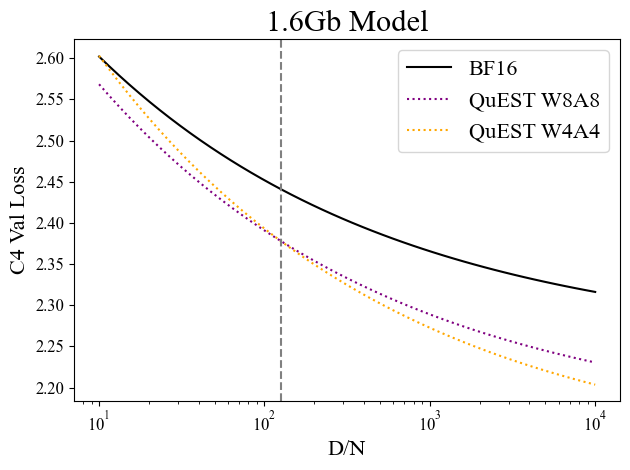

In [143]:
data_to_sizes = np.logspace(1, 4, base=10)

bf16_losses = []
quest8_losses = []
quest4_losses = []
quest48_losses = []

bf_params = 800e6

for data_to_size in data_to_sizes:
    data = bf_params * data_to_size
    
    bf16_loss = model(best_result.x, bf_params, data, 16)
    bf16_losses.append(bf16_loss)
    
    quest8_loss = model(best_result.x, bf_params * 2, data / 2, 8)
    quest8_losses.append(quest8_loss)
    
    quest4_loss = model(best_result.x, bf_params * 4, data / 4, 4)
    quest4_losses.append(quest4_loss)
    
    quest48_loss = model(best_result.x, bf_params * 8.0, data / 8.0, 2.5)
    quest48_losses.append(quest48_loss)
    
plt.plot(data_to_sizes, bf16_losses, label="BF16", color=colors[16], linestyle=linestyles["NoQuantizer"])
plt.plot(data_to_sizes, quest8_losses, label="QuEST W8A8", color=colors[8], linestyle=linestyles["HadamardTrustQuantizer"])
plt.plot(data_to_sizes, quest4_losses, label="QuEST W4A4", color=colors[4], linestyle=linestyles["HadamardTrustQuantizer"])
# plt.plot(data_to_sizes, quest48_losses, label="QuEST 2:4", color=colors[4], linestyle=linestyles["HadamardFourEightTrustQuantizer"])

plt.axvline(data_to_sizes[np.argmin(np.abs(np.array(quest8_losses) - np.array(quest4_losses)))], color="grey", linestyle="--")
# plt.axvline(data_to_sizes[np.argmin(np.abs(np.array(quest48_losses) - np.array(quest4_losses)))], color="grey", linestyle="--")

plt.xlabel("D/N")
plt.xscale("log")
plt.ylabel("C4 Val Loss")

plt.title(f"{bf_params * 2e-9:.1f}Gb Model", fontsize=22)

plt.legend()
plt.tight_layout()
plt.savefig("../figures/isomem.pdf", bbox_inches='tight')

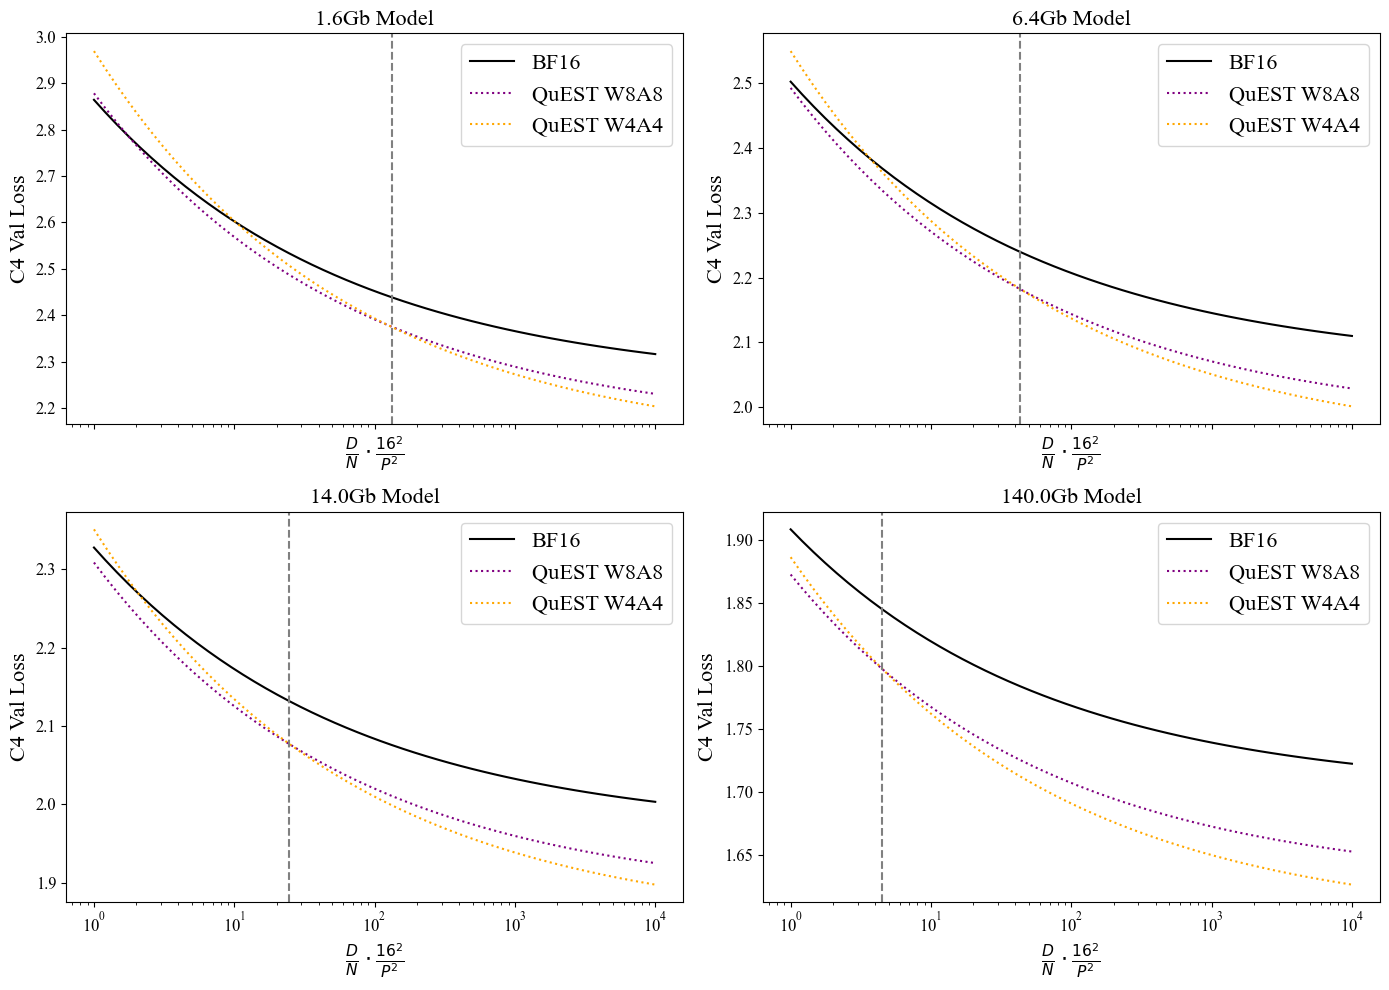

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Example definitions or placeholders:
# best_result.x = [...]
# def model(x, N, data_size, bits): return some_loss_value
# colors = {16: 'blue', 8: 'orange', 4: 'green'}
# linestyles = {"NoQuantizer": "-", "HadamardTrustQuantizer": "--", "HadamardFourEightTrustQuantizer": ":"}

bf_params_list = [800e6, 3.2e9, 7e9, 70e9]  # 800M, 3.2B, 7B, 70B
data_to_sizes = np.logspace(0, 4, base=10)  # D/N values on x-axis

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

for ax, bf_params in zip(axes.flatten(), bf_params_list):
    bf16_losses = []
    quest8_losses = []
    quest4_losses = []
    quest48_losses = []
    
    for dts in data_to_sizes:
        data = bf_params * dts
        
        bf16_loss = model(best_result.x, bf_params,       data,       16)
        quest8_loss = model(best_result.x, bf_params * 2, data / 2,   8)
        quest4_loss = model(best_result.x, bf_params * 4, data / 4,   4)
        quest48_loss = model(best_result.x, bf_params * 8, data / 8, 2.5)  # QuEST 2:4 if needed
        
        bf16_losses.append(bf16_loss)
        quest8_losses.append(quest8_loss)
        quest4_losses.append(quest4_loss)
        quest48_losses.append(quest48_loss)
    
    # Plot curves:
    ax.plot(data_to_sizes, bf16_losses,   label="BF16",
            color=colors[16], linestyle=linestyles["NoQuantizer"])
    ax.plot(data_to_sizes, quest8_losses, label="QuEST W8A8",
            color=colors[8],  linestyle=linestyles["HadamardTrustQuantizer"])
    ax.plot(data_to_sizes, quest4_losses, label="QuEST W4A4",
            color=colors[4],  linestyle=linestyles["HadamardTrustQuantizer"])
    # If you want to include the QuEST 2:4 line, uncomment:
    # ax.plot(data_to_sizes, quest48_losses, label="QuEST 2:4",
    #         color=colors[4], linestyle=linestyles["HadamardFourEightTrustQuantizer"])

    # Vertical line for when QuEST W8A8 ~ QuEST W4A4
    arg_min = np.argmin(np.abs(np.array(quest8_losses) - np.array(quest4_losses)))
    ax.axvline(data_to_sizes[arg_min], color="grey", linestyle="--")
    
    ax.set_xscale("log")
    ax.set_xlabel(r"$\frac{D}{N}\cdot\frac{16^2}{P^2}$")
    ax.set_ylabel("C4 Val Loss")
    
    # Convert 'bf_params * 2e-9' into GB (or Gb) for the title:
    title_val = bf_params * 2e-9  # original snippet used 2e-9 scaling
    ax.set_title(f"{title_val:.1f}Gb Model", fontsize=16)
    
    ax.legend()

plt.tight_layout()
plt.savefig("../figures/isomem.pdf", bbox_inches='tight')
plt.show()


In [145]:
HadamardTrustSimilarities = {'model.transformer.h.5.mlp.c_proj': {'mean': 0.98828125, 'std': 0.0771484375},
 'model.transformer.h.5.attn.c_proj': {'mean': 0.98046875,
  'std': 0.07275390625},
 'model.transformer.h.4.mlp.c_proj': {'mean': 0.953125, 'std': 0.09912109375},
 'model.transformer.h.4.attn.c_proj': {'mean': 0.9453125,
  'std': 0.10107421875},
 'model.transformer.h.3.mlp.c_proj': {'mean': 0.93359375, 'std': 0.103515625},
 'model.transformer.h.3.attn.c_proj': {'mean': 0.921875, 'std': 0.1103515625},
 'model.transformer.h.2.mlp.c_proj': {'mean': 0.90625, 'std': 0.1220703125},
 'model.transformer.h.2.attn.c_proj': {'mean': 0.90234375,
  'std': 0.12255859375},
 'model.transformer.h.1.mlp.c_proj': {'mean': 0.89453125, 'std': 0.119140625},
 'model.transformer.h.1.attn.c_proj': {'mean': 0.8828125, 'std': 0.1328125},
 'model.transformer.h.0.mlp.c_proj': {'mean': 0.875, 'std': 0.1328125},
 'model.transformer.h.0.attn.c_proj': {'mean': 0.828125, 'std': 0.1865234375}}

TrustSimilarities = {'model.transformer.h.5.mlp.c_proj': {'mean': 0.76171875, 'std': 0.150390625},
 'model.transformer.h.5.attn.c_proj': {'mean': 0.515625, 'std': 0.17578125},
 'model.transformer.h.4.mlp.c_proj': {'mean': 0.3671875, 'std': 0.1875},
 'model.transformer.h.4.attn.c_proj': {'mean': 0.3046875, 'std': 0.16015625},
 'model.transformer.h.3.mlp.c_proj': {'mean': 0.2431640625,
  'std': 0.1474609375},
 'model.transformer.h.3.attn.c_proj': {'mean': 0.208984375,
  'std': 0.1298828125},
 'model.transformer.h.2.mlp.c_proj': {'mean': 0.1630859375,
  'std': 0.12451171875},
 'model.transformer.h.2.attn.c_proj': {'mean': 0.146484375,
  'std': 0.11279296875},
 'model.transformer.h.1.mlp.c_proj': {'mean': 0.126953125,
  'std': 0.1103515625},
 'model.transformer.h.1.attn.c_proj': {'mean': 0.109375, 'std': 0.09912109375},
 'model.transformer.h.0.mlp.c_proj': {'mean': 0.08935546875,
  'std': 0.0927734375},
 'model.transformer.h.0.attn.c_proj': {'mean': 0.053466796875,
  'std': 0.0966796875}}

STESimilarities = {'model.transformer.h.5.mlp.c_proj': {'mean': 0.7980809807777405,
  'std': 0.19133338332176208},
 'model.transformer.h.5.attn.c_proj': {'mean': 0.47584787011146545,
  'std': 0.18935102224349976},
 'model.transformer.h.4.mlp.c_proj': {'mean': 0.34503230452537537,
  'std': 0.1870272308588028},
 'model.transformer.h.4.attn.c_proj': {'mean': 0.22640655934810638,
  'std': 0.16238078474998474},
 'model.transformer.h.3.mlp.c_proj': {'mean': 0.16447949409484863,
  'std': 0.14397986233234406},
 'model.transformer.h.3.attn.c_proj': {'mean': 0.10793957114219666,
  'std': 0.14472198486328125},
 'model.transformer.h.2.mlp.c_proj': {'mean': 0.07829369604587555,
  'std': 0.11807195842266083},
 'model.transformer.h.2.attn.c_proj': {'mean': 0.062155239284038544,
  'std': 0.14942869544029236},
 'model.transformer.h.1.mlp.c_proj': {'mean': 0.04646104946732521,
  'std': 0.15194371342658997},
 'model.transformer.h.1.attn.c_proj': {'mean': 0.037694450467824936,
  'std': 0.24229077994823456},
 'model.transformer.h.0.mlp.c_proj': {'mean': 0.033532772213220596,
  'std': 0.24056945741176605},
 'model.transformer.h.0.attn.c_proj': {'mean': 0.008873962797224522,
  'std': 0.5503823757171631}}

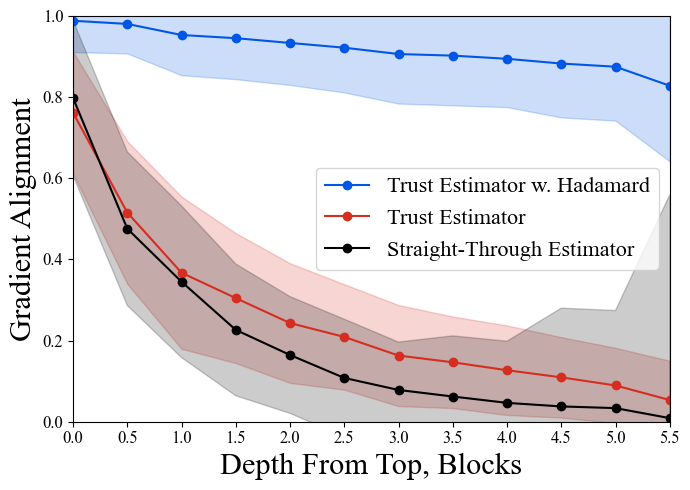

In [146]:
import numpy as np

def depth_from_name(name):
    idx = int(name.split(".")[3])
    depth = 5 - idx
    if "attn" in name:
        depth += 0.5
    return depth


# Your provided data
data = HadamardTrustSimilarities

# Initialize lists to store processed data
x_values = []
means = []
stds = []

# Process each key to extract 'n' and compute '6 - n'
for key, values in data.items():
    # Extract 'n' from the key using string manipulation
    # Assuming the key format is consistent
    x = depth_from_name(key)
    x_values.append(x)
    means.append(values['mean'])
    stds.append(values['std'])

# Sort the data based on x_values to ensure the plot is ordered
sorted_indices = np.argsort(x_values)
x_sorted = np.array(x_values)[sorted_indices]
means_sorted = np.array(means)[sorted_indices]
stds_sorted = np.array(stds)[sorted_indices]

# Create the plot
plt.figure(figsize=(7, 5))
plt.plot(x_sorted, means_sorted, marker='o', linestyle='-', color=blue_color, label='Trust Estimator w. Hadamard')

# Using a shaded region to represent ±1 std
plt.fill_between(
    x_sorted,
    means_sorted - stds_sorted,
    means_sorted + stds_sorted,
    color=blue_color,
    alpha=0.2,
)


# Your provided data
data = TrustSimilarities

# Initialize lists to store processed data
x_values = []
means = []
stds = []

# Process each key to extract 'n' and compute '6 - n'
for key, values in data.items():
    # Extract 'n' from the key using string manipulation
    # Assuming the key format is consistent
    x = depth_from_name(key)
    x_values.append(x)
    means.append(values['mean'])
    stds.append(values['std'])

# Sort the data based on x_values to ensure the plot is ordered
sorted_indices = np.argsort(x_values)
x_sorted = np.array(x_values)[sorted_indices]
means_sorted = np.array(means)[sorted_indices]
stds_sorted = np.array(stds)[sorted_indices]

# Create the plot
plt.plot(x_sorted, means_sorted, marker='o', linestyle='-', color=red_color, label='Trust Estimator')

# Using a shaded region to represent ±1 std
plt.fill_between(
    x_sorted,
    means_sorted - stds_sorted,
    means_sorted + stds_sorted,
    color=red_color,
    alpha=0.2,
)


# Your provided data
data = STESimilarities

# Initialize lists to store processed data
x_values = []
means = []
stds = []

# Process each key to extract 'n' and compute '6 - n'
for key, values in data.items():
    # Extract 'n' from the key using string manipulation
    # Assuming the key format is consistent
    x = depth_from_name(key)
    x_values.append(x)
    means.append(values['mean'])
    stds.append(values['std'])

# Sort the data based on x_values to ensure the plot is ordered
sorted_indices = np.argsort(x_values)
x_sorted = np.array(x_values)[sorted_indices]
means_sorted = np.array(means)[sorted_indices]
stds_sorted = np.array(stds)[sorted_indices]

# Create the plot
plt.plot(x_sorted, means_sorted, marker='o', linestyle='-', color='black', label='Straight-Through Estimator')

# Using a shaded region to represent ±1 std
plt.fill_between(
    x_sorted,
    means_sorted - stds_sorted,
    means_sorted + stds_sorted,
    color='black',
    alpha=0.2,
)


# Customize the plot
plt.xlabel('Depth From Top, Blocks', fontsize=22)
plt.ylabel('Gradient Alignment', fontsize=22)
plt.xticks(x_sorted)  # Ensure x-axis has integer ticks corresponding to (6 - n)
plt.ylim(0, 1)
plt.xlim(0, 5.5)
plt.legend(fontsize=16)
plt.tight_layout()

# Display the plot
plt.savefig("../figures/gradient_alignment.pdf")
plt.show()


# MASKS

In [147]:
hadamard_trust_mask_proportion = {0: 9.036064147949219e-05,
 500: 0.00012940168380737305,
 1000: 8.547306060791016e-05,
 1500: 9.518861770629883e-05,
 2000: 0.00012451410293579102,
 2500: 0.00013184547424316406,
 3000: 0.00012451410293579102,
 3500: 0.0001391768455505371,
 4000: 0.0001513957977294922,
 4500: 0.0001513957977294922,
 5000: 0.00014895200729370117,
 5500: 0.00017577409744262695,
 6000: 0.00010251998901367188,
 6500: 0.0001220703125,
 7000: 0.00011473894119262695,
 7500: 0.00011229515075683594,
 8000: 0.00012940168380737305,
 8500: 0.0001220703125,
 9000: 0.00011718273162841797,
 9500: 8.791685104370117e-05,
 10000: 9.763240814208984e-05,
 10500: 8.058547973632812e-05,
 11000: 9.036064147949219e-05}

trust_mask_proportion = {0: 0.00011962652206420898,
 500: 0.0002294778823852539,
 1000: 0.00022214651107788086,
 1500: 0.0002588033676147461,
 2000: 0.000363767147064209,
 2500: 0.0003955364227294922,
 3000: 0.00043213367462158203,
 3500: 0.00045412778854370117,
 4000: 0.00048094987869262695,
 4500: 0.000493168830871582,
 5000: 0.0005199909210205078,
 5500: 0.0005248785018920898,
 6000: 0.000554203987121582,
 6500: 0.0005713105201721191,
 7000: 0.0005297660827636719,
 7500: 0.0004980564117431641,
 8000: 0.000495612621307373,
 8500: 0.000485837459564209,
 9000: 0.00048094987869262695,
 9500: 0.0004711747169494629,
 10000: 0.00046384334564208984,
 10500: 0.0004419088363647461,
 11000: 0.00043457746505737305}

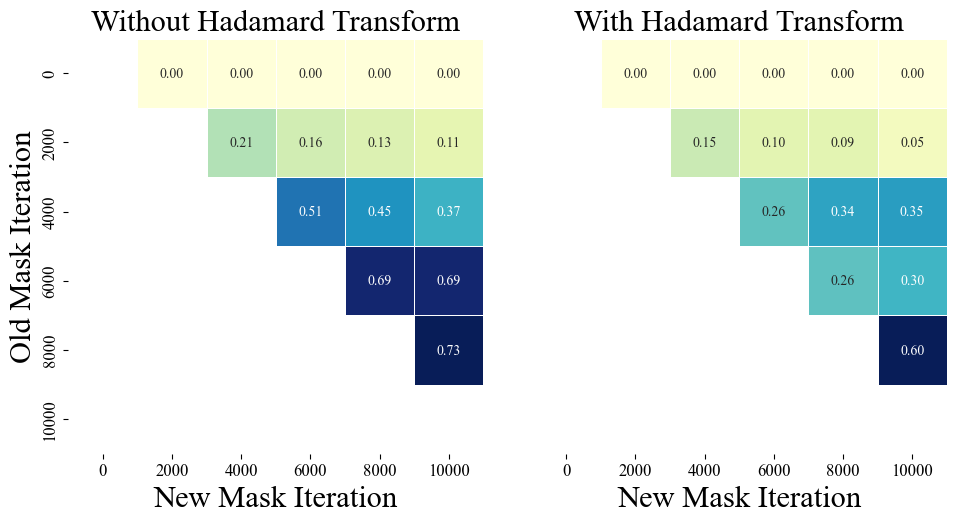

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# Create a figure and a heatmap
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

causal_df = pd.read_csv("../for_plots/masks.csv", index_col=0)
mask_visual = causal_df.isna()
sns.heatmap(
    causal_df,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=.5,
    square=True,
    cbar=False,
    ax=axs[0]
)
axs[0].set_title("Without Hadamard Transform", fontsize=22)

# Customize labels and layout
axs[0].set_xlabel("New Mask Iteration", fontsize=22)
axs[0].set_ylabel("Old Mask Iteration", fontsize=22)

causal_df = pd.read_csv("../for_plots/hadamard_masks.csv", index_col=0)
mask_visual = causal_df.isna()
sns.heatmap(
    causal_df,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=.5,
    square=True,
    cbar=False,
    ax=axs[1]
)
axs[1].set_title("With Hadamard Transform", fontsize=22)

# Customize labels and layout
axs[1].set_xlabel("New Mask Iteration", fontsize=22)

# delete y ticks
axs[1].set_yticks([])
axs[1].set_ylabel("")

fig.tight_layout()
fig.savefig("../figures/masks_persistency.pdf", bbox_inches='tight')
# Display the plot
plt.show()


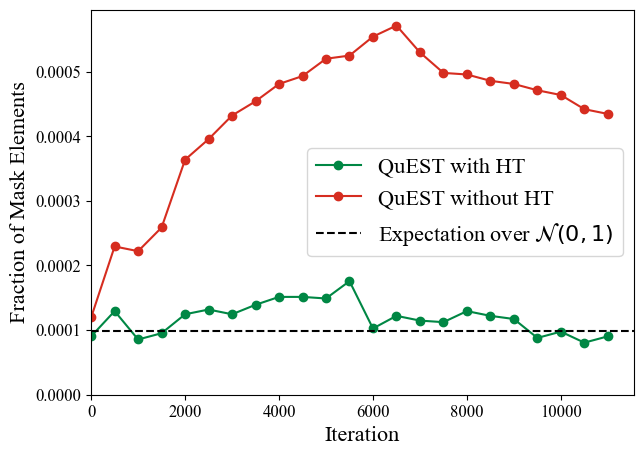

In [149]:
plt.figure(figsize=(7, 5))

plt.plot(hadamard_trust_mask_proportion.keys(), hadamard_trust_mask_proportion.values(), label="QuEST with HT", marker="o", color=green_color)
plt.plot(trust_mask_proportion.keys(), trust_mask_proportion.values(), label="QuEST without HT", marker="o", color=red_color)
plt.axhline(2 * norm.sf(3.884938678807525 * (1 + 1 / 255 / 2)), color="black", linestyle="--", label=r"Expectation over $\mathcal{N}(0, 1)$")

plt.xlim(0, None)
plt.xlabel("Iteration")

plt.ylim(0, None)
plt.ylabel(r"Fraction of Mask Elements")

plt.legend()
plt.savefig("../figures/mask_proportion.pdf", bbox_inches='tight')

plt.show()

In [150]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api(timeout=29)

# Fetch runs from your project
project_runs = api.runs("ist/llm-baselines")

In [151]:
extra_runs = []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    
    model_size = int(run.name.split("-")[1][:-1]) if not run.name[0].isnumeric() else int(run.name.split("-")[0][:-1])
    loss = run.summary.get('final-val/loss')
    quant = run.config.get("w_quant")
    w_quant_arg = run.config.get("w_quant_kwargs")
    a_quant_arg = run.config.get("a_quant_kwargs")
    dataset = run.config.get("dataset")
    lr = run.config.get("lr")
    
    if loss is not None and dataset is not None and dataset == "c4":
        tokens = run.config["iterations"] * run.config["batch_size"] * run.config["sequence_length"] * run.config["acc_steps"] * run.config["world_size"]
        non_embedding_parameters = run.summary["non_embedding_parameters"]
        
        if model_size == 100 and lr != 0.0006 and w_quant_arg is not None and w_quant_arg['bits'] in [1, 2]: 
            continue
        
        if model_size == 200 and lr == 0.00003:
            continue
        
        if run.config.get("vocab_size") == 32000:
            continue
        
        extra_runs.append({
            'model_size': model_size, #12 * run.config['n_layer'] * run.config['n_embd'] ** 2 * 1e-6
            'w_bits': w_quant_arg.get('bits') if w_quant_arg is not None else 16,
            'a_bits': a_quant_arg.get('bits') if a_quant_arg is not None else 16,
            'loss': loss,
            'tokens': tokens,
            'bops': non_embedding_parameters * tokens,
            'w_quant': quant,
            'a_quant': run.config["a_quant"],
            'trust': w_quant_arg.get("trust") if w_quant_arg is not None else None,
            'p': w_quant_arg.get("p") if w_quant_arg is not None else None,
            'clip_scale': w_quant_arg.get("clip_scale") if w_quant_arg is not None else None,
        })

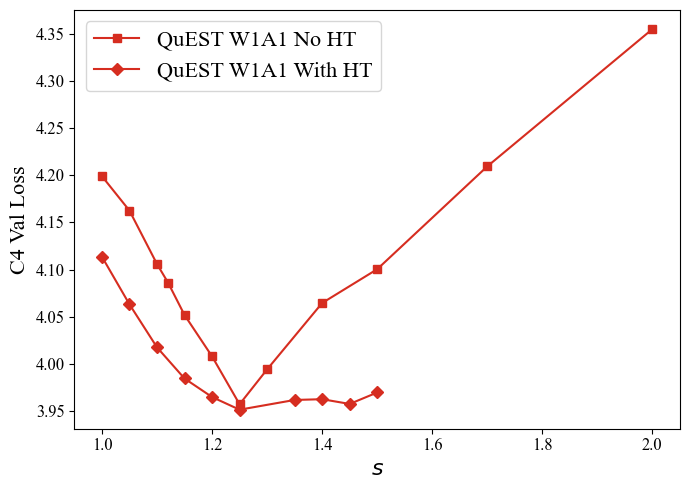

In [152]:
# ClipQuantizer
plt.figure(figsize=(7, 5))

clip_scale_losses = {run['clip_scale']: run['loss'] for run in extra_runs if run['w_quant'] == 'ClipQuantizer' and run['a_quant'] == 'ClipQuantizer' and run['clip_scale'] is not None and int(run['model_size']) == 30 and run['w_bits'] == 1 and run['a_bits'] == 1}
clip_scale_losses[2] = [run['loss'] for run in extra_runs if int(run['model_size']) == 30 and run['w_quant'] == 'TrustQuantizer' and run['a_quant'] == 'TrustQuantizer' and run['w_bits'] == 1 and run['a_bits'] == 1][0]
plt.plot(sorted(clip_scale_losses.keys()), [clip_scale_losses[clip_scale] for clip_scale in sorted(clip_scale_losses.keys())], 
         color=colors[1], marker=markers["TrustQuantizer"], label="QuEST W1A1 No HT")

# HadamardClipQuantizer
clip_scale_losses = {run['clip_scale']: run['loss'] for run in extra_runs if run['w_quant'] == 'HadamardClipQuantizer' and run['clip_scale'] is not None and int(run['model_size']) == 30 and run['w_bits'] == 1 and run['a_bits'] == 1}
# clip_scale_losses[2] = [run['loss'] for run in runs if int(run['model_size']) == 30 and run['w_quant'] == 'HadamardTrustQuantizer' and run['w_bits'] == 1 and run['a_bits'] == 1][0]
plt.plot(sorted(clip_scale_losses.keys()), [clip_scale_losses[clip_scale] for clip_scale in sorted(clip_scale_losses.keys())],
         color=colors[1], marker=markers["HadamardTrustQuantizer"], label="QuEST W1A1 With HT")

# HadamardTrustQuantizer, 2bit
# plt.axhline([run['loss'] for run in extra_runs if int(run['model_size']) == 30 and run['w_quant'] == 'HadamardTrustQuantizer' and run['w_bits'] == 2 and run['a_bits'] == 2 and run['trust'] is None][0], linestyle="--", color="black", label="HTQ, 2bit")

plt.legend()
plt.xlabel("$s$")
plt.ylabel("C4 Val Loss")
plt.tight_layout()
plt.savefig("../figures/trust_scale.pdf", bbox_inches="tight")
plt.show()

/var/folders/sl/h38cfvs96gd8t7hw4_y7c1940000gn/T/ipykernel_3088/354786189.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


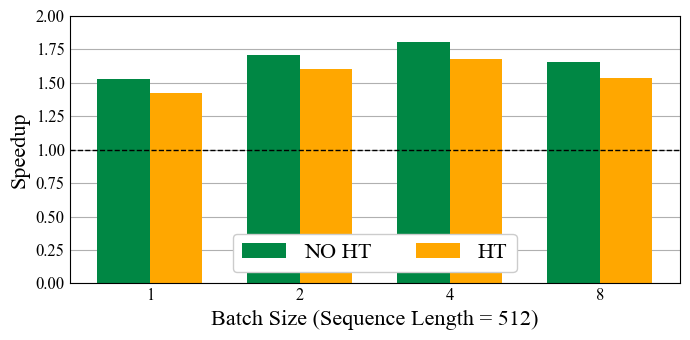

In [154]:
batch_sizes = 2 ** np.arange(0, 4)
seq_len = 1 * 512

# Poster
# runtime = [[0.00820159912109375, 0.006977081298828125, 0.007503032684326172, 0.0025534629821777344], [0.014844894409179688, 0.009854555130004883, 0.01077580451965332, 0.004026174545288086], [0.028223276138305664, 0.01824808120727539, 0.019972562789916992, 0.008173942565917969], [0.061135053634643555, 0.04083442687988281, 0.04377317428588867, 0.02344965934753418]]
# + Current code
# runtime = [[0.008215665817260742, 0.0066907405853271484, 0.007170677185058594, 0.002669811248779297], [0.014887571334838867, 0.009590387344360352, 0.01047205924987793, 0.004220724105834961], [0.02843642234802246, 0.017493247985839844, 0.019148588180541992, 0.008340835571289062], [0.06130194664001465, 0.039703369140625, 0.04292774200439453, 0.023451566696166992]]
# + Dense Hadamard
# runtime = [[0.008200883865356445, 0.006688117980957031, 0.007124185562133789, 0.0026700496673583984], [0.014887809753417969, 0.009563922882080078, 0.010237693786621094, 0.004220485687255859], [0.028465986251831055, 0.017488479614257812, 0.01861262321472168, 0.008365154266357422], [0.061315298080444336, 0.040015220642089844, 0.043294429779052734, 0.023410558700561523]]
# + 1600M
runtime = [[0.014583349227905273, 0.009559869766235352, 0.01024007797241211, 0.0040416717529296875], [0.026798009872436523, 0.01566147804260254, 0.01674056053161621, 0.006421089172363281], [0.05249500274658203, 0.029030561447143555, 0.031310319900512695, 0.013670682907104492], [0.11581301689147949, 0.06999063491821289, 0.07539033889770508, 0.043609619140625]]

runtime = np.asarray(runtime)

t_base, t_kernel, t_kernel_had, t_noop = np.split(runtime, 4, axis=-1)

speedups = t_base.flatten() / t_kernel.flatten()
speedups_had = t_base.flatten() / t_kernel_had.flatten()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7., 3.5))
bar_width = 0.35

x_indexes = range(len(batch_sizes))
ax.bar(x_indexes, speedups, width=bar_width, color=green_color, label='NO HT', zorder=2)
ax.bar([x + bar_width for x in x_indexes], speedups_had, width=bar_width, color=yellow_color, label='HT', zorder=2)
ax.axhline(y=1., color='black', linestyle='--', linewidth=1)
ax.set_xticks([x + bar_width / 2 for x in x_indexes])
ax.set_xticklabels(batch_sizes, rotation=0., ha='center')
ax.set_xlabel(f'Batch Size (Sequence Length = {seq_len})')
ax.set_ylim(0., 2.)
ax.set_yticks(np.arange(0, 2.1, .25))
ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()])
ax.set_ylabel('Speedup')
ax.grid(axis='y')
ax.tick_params(axis='both', which='both', length=0)
ax.legend(ncol=2, loc='lower center', framealpha=1.)
ax.set_facecolor((1., 1., 1., 1.))
fig.set_facecolor((1., 1., 1., 0.))
fig.tight_layout()
fig.savefig(f'../figures/e2e_speedup.pdf', bbox_inches='tight', pad_inches=.01, transparent=False)
fig.show()

/var/folders/sl/h38cfvs96gd8t7hw4_y7c1940000gn/T/ipykernel_3088/2137141421.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


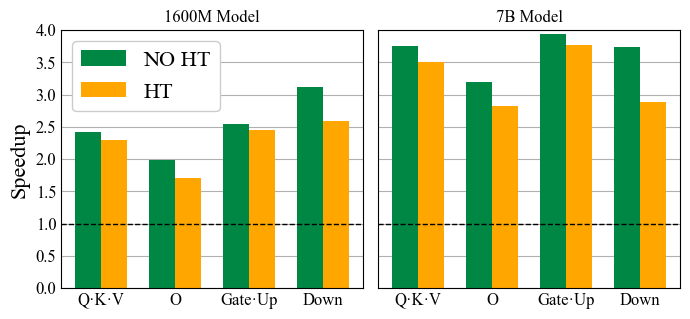

In [155]:
# POSTER
# runtime_dict = {(6144, 2048): [(32.0, 1.5664100646972657e-05, 3.68952751159668e-05, 3.836154937744141e-05), (64.0, 1.6295909881591796e-05, 3.703832626342773e-05, 3.8576126098632815e-05), (128.0, 3.1006336212158206e-05, 3.687143325805664e-05, 3.888607025146484e-05), (256.0, 4.991292953491211e-05, 3.752708435058594e-05, 4.062652587890625e-05), (512.0, 7.977485656738282e-05, 6.266832351684571e-05, 6.761550903320313e-05), (1024.0, 0.00015482902526855468, 9.266138076782226e-05, 0.00010137557983398437), (2048.0, 0.00029935836791992185, 0.00016422271728515624, 0.00018064975738525392), (4096.0, 0.0006081700325012207, 0.0003091335296630859, 0.0003448486328125), (8192.0, 0.001201319694519043, 0.0006205081939697265, 0.0006702065467834473), (16384.0, 0.0023813486099243165, 0.0012459158897399902, 0.0013506054878234864)], (2048, 2048): [(32.0, 7.796287536621094e-06, 3.598928451538086e-05, 3.726482391357422e-05), (64.0, 8.368492126464844e-06, 3.600120544433594e-05, 3.7562847137451175e-05), (128.0, 1.208782196044922e-05, 3.6549568176269534e-05, 3.859996795654297e-05), (256.0, 1.753568649291992e-05, 3.789663314819336e-05, 4.087686538696289e-05), (512.0, 2.8681755065917968e-05, 3.921985626220703e-05, 4.4178962707519534e-05), (1024.0, 5.295276641845703e-05, 4.1937828063964845e-05, 5.069971084594727e-05), (2048.0, 0.00010226964950561523, 7.492303848266602e-05, 9.136199951171875e-05), (4096.0, 0.00020072460174560546, 0.00013153553009033204, 0.00016342401504516603), (8192.0, 0.0004084944725036621, 0.00024529695510864256, 0.0003087043762207031), (16384.0, 0.0008088350296020508, 0.0004986405372619628, 0.0006472110748291015)], (11264, 2048): [(32.0, 2.2113323211669922e-05, 3.629922866821289e-05, 3.7729740142822266e-05), (64.0, 3.0446052551269532e-05, 3.652572631835937e-05, 3.8123130798339845e-05), (128.0, 4.5800209045410155e-05, 3.7157535552978514e-05, 3.917217254638672e-05), (256.0, 7.904767990112305e-05, 6.142854690551757e-05, 6.44683837890625e-05), (512.0, 0.00015201568603515626, 8.797645568847656e-05, 9.298324584960938e-05), (1024.0, 0.0002832174301147461, 0.0001560211181640625, 0.00016477108001708985), (2048.0, 0.0005573153495788575, 0.0002753615379333496, 0.0002919673919677734), (4096.0, 0.0011066675186157226, 0.000542140007019043, 0.0005684018135070801), (8192.0, 0.0021861791610717773, 0.001068115234375, 0.001109910011291504), (16384.0, 0.004347848892211914, 0.0021367907524108888, 0.0022353649139404295)], (2048, 5632): [(32.0, 1.5938282012939452e-05, 5.604028701782227e-05, 5.9604644775390625e-05), (64.0, 1.4662742614746094e-05, 5.621910095214844e-05, 6.0439109802246094e-05), (128.0, 2.3126602172851562e-05, 5.36799430847168e-05, 5.750656127929687e-05), (256.0, 4.469156265258789e-05, 5.459785461425781e-05, 6.107091903686523e-05), (512.0, 7.659196853637695e-05, 6.105899810791016e-05, 7.420778274536133e-05), (1024.0, 0.00014688968658447266, 7.35163688659668e-05, 9.654760360717773e-05), (2048.0, 0.000284576416015625, 0.00012165307998657227, 0.00016492605209350586), (4096.0, 0.0005589604377746582, 0.00023299455642700195, 0.0003341555595397949), (8192.0, 0.0011075377464294434, 0.0005045652389526368, 0.0007009744644165039), (16384.0, 0.002198648452758789, 0.0009745359420776367, 0.0013836860656738282)], (12288, 4096): [(32.0, 0.00012543201446533204, 4.609823226928711e-05, 4.763603210449219e-05), (64.0, 0.0001171112060546875, 4.801750183105469e-05, 5.0067901611328125e-05), (128.0, 0.00014537572860717773, 4.884004592895508e-05, 5.179643630981445e-05), (256.0, 0.00016628503799438478, 7.624626159667969e-05, 8.11457633972168e-05), (512.0, 0.0003058910369873047, 0.00011197328567504882, 0.00012063980102539062), (1024.0, 0.0006033182144165039, 0.00018783807754516602, 0.00020437240600585939), (2048.0, 0.0011951208114624023, 0.0003477931022644043, 0.0003804802894592285), (4096.0, 0.002378535270690918, 0.0006697654724121093, 0.0007165670394897461), (8192.0, 0.004733943939208984, 0.0013137340545654296, 0.0014173388481140137), (16384.0, 0.009439027309417725, 0.0026080846786499024, 0.002891051769256592)], (4096, 4096): [(32.0, 1.7464160919189453e-05, 4.756450653076172e-05, 4.897117614746094e-05), (64.0, 1.946687698364258e-05, 4.7588348388671874e-05, 4.9614906311035155e-05), (128.0, 3.40580940246582e-05, 4.6420097351074216e-05, 4.945993423461914e-05), (256.0, 5.319118499755859e-05, 4.891157150268555e-05, 5.3834915161132815e-05), (512.0, 0.00010161399841308593, 5.08427619934082e-05, 5.9592723846435544e-05), (1024.0, 0.00019941329956054687, 9.083747863769531e-05, 0.00010738372802734374), (2048.0, 0.0004003405570983887, 0.00015189647674560547, 0.00018385648727416992), (4096.0, 0.0008005023002624512, 0.00028160810470581057, 0.0003510355949401855), (8192.0, 0.001591646671295166, 0.0005546212196350098, 0.0006948709487915039), (16384.0, 0.0031703829765319822, 0.0011178255081176758, 0.001407921314239502)], (22016, 4096): [(32.0, 0.00020154714584350586, 6.946325302124024e-05, 7.120370864868164e-05), (64.0, 0.00022679567337036133, 6.996393203735351e-05, 7.195472717285157e-05), (128.0, 0.00023146867752075196, 7.390975952148438e-05, 7.68899917602539e-05), (256.0, 0.00029577016830444335, 0.00010907649993896484, 0.00011401176452636718), (512.0, 0.000551605224609375, 0.000180971622467041, 0.00019037723541259766), (1024.0, 0.001090085506439209, 0.0003067612648010254, 0.000323641300201416), (2048.0, 0.0021363973617553713, 0.000573277473449707, 0.0005970239639282226), (4096.0, 0.004250955581665039, 0.0010898828506469727, 0.001132059097290039), (8192.0, 0.008463811874389649, 0.002158379554748535, 0.0022527217864990235), (16384.0, 0.01689506769180298, 0.004287993907928467, 0.0045724987983703615)], (4096, 11008): [(32.0, 0.00010818243026733398, 8.498430252075195e-05, 9.09566879272461e-05), (64.0, 0.00011299848556518554, 8.52823257446289e-05, 9.248256683349609e-05), (128.0, 0.00011371374130249023, 8.431673049926757e-05, 9.052753448486328e-05), (256.0, 0.00014685392379760743, 8.178949356079102e-05, 9.325742721557617e-05), (512.0, 0.0002791881561279297, 9.700059890747071e-05, 0.00012192726135253906), (1024.0, 0.0005466699600219727, 0.00016241073608398439, 0.00020751953125), (2048.0, 0.0010801434516906738, 0.0002954959869384766, 0.000379478931427002), (4096.0, 0.002150881290435791, 0.0006214141845703125, 0.0008040070533752441), (8192.0, 0.004290878772735596, 0.0011992573738098145, 0.00159759521484375), (16384.0, 0.008563745021820068, 0.002915811538696289, 0.0037134647369384765)]}
# + Current Code
# runtime_dict = {(6144, 2048): [(32.0, 1.596212387084961e-05, 3.5774707794189456e-05, 3.708600997924805e-05), (64.0, 1.6438961029052735e-05, 3.589391708374024e-05, 3.7503242492675784e-05), (128.0, 3.1161308288574216e-05, 3.657341003417969e-05, 3.8683414459228516e-05), (256.0, 5.142688751220703e-05, 3.724098205566406e-05, 4.029273986816406e-05), (512.0, 8.108615875244141e-05, 6.23464584350586e-05, 6.723403930664062e-05), (1024.0, 0.00015702247619628907, 9.049177169799805e-05, 9.955167770385742e-05), (2048.0, 0.0003024101257324219, 0.0001635909080505371, 0.00017954111099243163), (4096.0, 0.0006072878837585449, 0.00030373334884643556, 0.0003393411636352539), (8192.0, 0.0012001276016235351, 0.0006083846092224121, 0.0006587862968444824), (16384.0, 0.0023766517639160155, 0.0012322306632995606, 0.0013234496116638183)], (2048, 2048): [(32.0, 7.700920104980468e-06, 3.47137451171875e-05, 3.6334991455078126e-05), (64.0, 8.249282836914063e-06, 3.5262107849121095e-05, 3.6835670471191406e-05), (128.0, 1.2063980102539063e-05, 3.4916400909423825e-05, 3.838539123535156e-05), (256.0, 1.7654895782470702e-05, 3.6716461181640625e-05, 3.980398178100586e-05), (512.0, 2.9075145721435548e-05, 3.757476806640625e-05, 4.290342330932617e-05), (1024.0, 5.36799430847168e-05, 4.061460494995117e-05, 4.957914352416992e-05), (2048.0, 0.00010349750518798829, 7.201433181762696e-05, 8.869171142578125e-05), (4096.0, 0.00020340681076049804, 0.00012717247009277343, 0.00015957355499267577), (8192.0, 0.0004076838493347168, 0.00023280382156372071, 0.0002964615821838379), (16384.0, 0.0008078575134277344, 0.0004776120185852051, 0.0006221413612365722)], (11264, 2048): [(32.0, 2.25067138671875e-05, 3.548860549926758e-05, 3.697872161865234e-05), (64.0, 3.0243396759033202e-05, 3.573894500732422e-05, 3.730058670043945e-05), (128.0, 4.582405090332031e-05, 3.645420074462891e-05, 3.894567489624023e-05), (256.0, 7.987022399902344e-05, 6.14166259765625e-05, 6.443262100219727e-05), (512.0, 0.00015329122543334962, 8.809566497802734e-05, 9.322166442871094e-05), (1024.0, 0.0002863287925720215, 0.00015693902969360352, 0.00016576051712036133), (2048.0, 0.0005646944046020508, 0.00027250051498413087, 0.0002889275550842285), (4096.0, 0.0011056184768676758, 0.0005370378494262695, 0.0005627632141113281), (8192.0, 0.0021805644035339357, 0.0010599136352539063, 0.001099872589111328), (16384.0, 0.004337430000305176, 0.002130758762359619, 0.002211785316467285)], (2048, 5632): [(32.0, 1.5270709991455077e-05, 5.067586898803711e-05, 5.2428245544433595e-05), (64.0, 1.4412403106689454e-05, 5.089044570922851e-05, 5.328655242919922e-05), (128.0, 2.3031234741210936e-05, 5.1355361938476564e-05, 5.519390106201172e-05), (256.0, 4.222393035888672e-05, 5.2821636199951175e-05, 5.930662155151367e-05), (512.0, 7.859468460083007e-05, 5.462169647216797e-05, 6.644725799560547e-05), (1024.0, 0.00014946460723876953, 6.281137466430664e-05, 8.524656295776367e-05), (2048.0, 0.00028922557830810545, 0.00011265277862548828, 0.0001565694808959961), (4096.0, 0.0005581974983215332, 0.00020085573196411134, 0.0003003358840942383), (8192.0, 0.001104593276977539, 0.0004676938056945801, 0.0006743073463439941), (16384.0, 0.0021945834159851074, 0.0009066104888916015, 0.0013147354125976562)], (12288, 4096): [(32.0, 0.0001223444938659668, 4.436969757080078e-05, 4.596710205078125e-05), (64.0, 0.00011811256408691406, 4.466772079467773e-05, 4.680156707763672e-05), (128.0, 0.00014939308166503907, 4.564523696899414e-05, 4.863739013671875e-05), (256.0, 0.00016764402389526367, 7.390975952148438e-05, 7.87496566772461e-05), (512.0, 0.0003095030784606934, 0.00011010169982910157, 0.00011892318725585938), (1024.0, 0.0006028532981872559, 0.0001823902130126953, 0.00019870996475219728), (2048.0, 0.001193857192993164, 0.00033881664276123045, 0.00037078857421875), (4096.0, 0.0023744821548461912, 0.0006446123123168945, 0.0006920695304870605), (8192.0, 0.004725146293640137, 0.0012799501419067383, 0.0013694405555725099), (16384.0, 0.009420621395111083, 0.0025528311729431153, 0.0028397798538208007)], (4096, 4096): [(32.0, 1.71661376953125e-05, 4.407167434692383e-05, 4.565715789794922e-05), (64.0, 1.938343048095703e-05, 4.4226646423339844e-05, 4.6324729919433596e-05), (128.0, 3.370046615600586e-05, 4.4798851013183595e-05, 4.7767162322998046e-05), (256.0, 5.3095817565917966e-05, 4.544258117675781e-05, 5.0508975982666014e-05), (512.0, 0.00010166168212890624, 4.837512969970703e-05, 5.716085433959961e-05), (1024.0, 0.00020030736923217773, 8.488893508911133e-05, 0.00010182857513427735), (2048.0, 0.00040488243103027345, 0.00014888048171997071, 0.00018124580383300782), (4096.0, 0.0007995247840881347, 0.0002571702003479004, 0.00032259225845336913), (8192.0, 0.0015882611274719237, 0.0005105018615722656, 0.0006512999534606934), (16384.0, 0.0031619906425476075, 0.001107943058013916, 0.0013988018035888672)], (22016, 4096): [(32.0, 0.0002010822296142578, 6.76274299621582e-05, 6.912946701049804e-05), (64.0, 0.00022826194763183593, 6.827116012573243e-05, 7.025003433227539e-05), (128.0, 0.0002301335334777832, 7.233619689941406e-05, 7.528066635131836e-05), (256.0, 0.00029457807540893554, 0.00010704994201660156, 0.00011194944381713867), (512.0, 0.0005531787872314453, 0.00017737150192260743, 0.00018715858459472656), (1024.0, 0.0010893702507019042, 0.0003058910369873047, 0.0003225088119506836), (2048.0, 0.0021289587020874023, 0.0005671977996826172, 0.0005902171134948731), (4096.0, 0.004243791103363037, 0.0010794878005981445, 0.0011201977729797363), (8192.0, 0.008443498611450195, 0.0021453857421875, 0.002230823040008545), (16384.0, 0.016852009296417236, 0.004260170459747315, 0.0045447230339050295)], (4096, 11008): [(32.0, 0.00010886192321777344, 7.401704788208008e-05, 7.677078247070312e-05), (64.0, 0.00011334419250488281, 7.435083389282227e-05, 7.822513580322266e-05), (128.0, 0.00011316537857055664, 7.500648498535157e-05, 8.144378662109376e-05), (256.0, 0.00014688968658447266, 7.619857788085938e-05, 8.802413940429687e-05), (512.0, 0.0002788543701171875, 8.606910705566406e-05, 0.00010790824890136719), (1024.0, 0.0005457878112792968, 0.00014716386795043945, 0.00019009113311767577), (2048.0, 0.0010763883590698242, 0.0002711176872253418, 0.00035631656646728516), (4096.0, 0.002142894268035889, 0.0005712032318115235, 0.0007639884948730469), (8192.0, 0.004274833202362061, 0.0011499524116516113, 0.0015491366386413575), (16384.0, 0.008546268939971924, 0.0028278350830078123, 0.003629148006439209)]}
# + Dense Hadamard
# runtime_dict = {(6144, 2048): [(32.0, 1.5664100646972657e-05, 3.557205200195312e-05, 3.753900527954101e-05), (64.0, 1.652240753173828e-05, 3.594160079956055e-05, 3.807544708251953e-05), (128.0, 3.145933151245117e-05, 3.645420074462891e-05, 3.9136409759521486e-05), (256.0, 5.2356719970703124e-05, 3.701448440551758e-05, 4.067420959472656e-05), (512.0, 8.041858673095703e-05, 6.195306777954102e-05, 6.682872772216797e-05), (1024.0, 0.00015692710876464845, 9.08970832824707e-05, 9.789466857910157e-05), (2048.0, 0.00030280351638793944, 0.00016286373138427735, 0.00017381906509399413), (4096.0, 0.0006150960922241211, 0.0003074169158935547, 0.00033718347549438477), (8192.0, 0.0012134432792663575, 0.0006151199340820312, 0.0006730437278747558), (16384.0, 0.0023766875267028807, 0.0012353420257568359, 0.0013370394706726074)], (2048, 2048): [(32.0, 7.68899917602539e-06, 3.508329391479492e-05, 3.74913215637207e-05), (64.0, 8.416175842285156e-06, 3.563165664672851e-05, 3.7837028503417966e-05), (128.0, 1.2171268463134765e-05, 3.629922866821289e-05, 3.883838653564453e-05), (256.0, 1.7714500427246093e-05, 3.6728382110595706e-05, 4.025697708129883e-05), (512.0, 2.905130386352539e-05, 3.764629364013672e-05, 4.259347915649414e-05), (1024.0, 5.359649658203125e-05, 4.0984153747558595e-05, 4.783868789672852e-05), (2048.0, 0.00010372400283813477, 7.030963897705078e-05, 8.107423782348633e-05), (4096.0, 0.00020338296890258788, 0.00012365579605102539, 0.0001430511474609375), (8192.0, 0.00041304826736450196, 0.00023021697998046876, 0.0002860546112060547), (16384.0, 0.0008072018623352051, 0.00047042369842529295, 0.0006025433540344238)], (11264, 2048): [(32.0, 2.143383026123047e-05, 3.503561019897461e-05, 3.743171691894531e-05), (64.0, 3.076791763305664e-05, 3.5810470581054685e-05, 3.798007965087891e-05), (128.0, 4.661083221435547e-05, 3.641843795776367e-05, 3.898143768310547e-05), (256.0, 8.014440536499023e-05, 6.0606002807617185e-05, 6.433725357055665e-05), (512.0, 0.00015317201614379884, 8.807182312011718e-05, 9.319782257080078e-05), (1024.0, 0.0002862453460693359, 0.00015609264373779298, 0.00016317367553710937), (2048.0, 0.0005648374557495117, 0.00027540922164916994, 0.0002862095832824707), (4096.0, 0.0011081814765930176, 0.0005345582962036133, 0.0005656003952026368), (8192.0, 0.0021849751472473146, 0.0010547637939453125, 0.001109302043914795), (16384.0, 0.004345703125, 0.0021325111389160155, 0.002219188213348389)], (2048, 5632): [(32.0, 1.5687942504882812e-05, 5.098581314086914e-05, 5.458593368530273e-05), (64.0, 1.5223026275634766e-05, 5.183219909667969e-05, 5.519390106201172e-05), (128.0, 2.338886260986328e-05, 5.087852478027344e-05, 5.53131103515625e-05), (256.0, 4.431009292602539e-05, 5.172491073608398e-05, 5.812644958496094e-05), (512.0, 7.818937301635742e-05, 5.5229663848876954e-05, 6.552934646606446e-05), (1024.0, 0.0001496434211730957, 6.389617919921875e-05, 7.946491241455078e-05), (2048.0, 0.0002889871597290039, 0.00010923147201538085, 0.0001352548599243164), (4096.0, 0.0005660891532897949, 0.0001992344856262207, 0.00031068325042724607), (8192.0, 0.0011069774627685547, 0.00046747922897338867, 0.0006631612777709961), (16384.0, 0.002197420597076416, 0.0009074687957763671, 0.0013189196586608886)], (12288, 4096): [(32.0, 0.00012513399124145508, 4.3511390686035156e-05, 4.5680999755859374e-05), (64.0, 0.00011745691299438476, 4.432201385498047e-05, 4.689693450927734e-05), (128.0, 0.00014830827713012694, 4.5466423034667966e-05, 4.903078079223633e-05), (256.0, 0.0001660943031311035, 7.37905502319336e-05, 7.863044738769532e-05), (512.0, 0.0003098130226135254, 0.00010906457901000976, 0.00011615753173828125), (1024.0, 0.0006110310554504394, 0.00018534660339355468, 0.00019617080688476561), (2048.0, 0.001195061206817627, 0.0003348946571350098, 0.0003692865371704102), (4096.0, 0.002377820014953613, 0.0006426453590393066, 0.0006989836692810059), (8192.0, 0.0047335982322692875, 0.0012785792350769043, 0.0013804674148559571), (16384.0, 0.009434354305267335, 0.002556037902832031, 0.0028538584709167482)], (4096, 4096): [(32.0, 1.7261505126953126e-05, 4.315376281738281e-05, 4.532337188720703e-05), (64.0, 1.9299983978271485e-05, 4.341602325439453e-05, 4.657506942749023e-05), (128.0, 3.427267074584961e-05, 4.4405460357666016e-05, 4.801750183105469e-05), (256.0, 5.402565002441406e-05, 4.5228004455566404e-05, 5.022287368774414e-05), (512.0, 0.00010300874710083008, 4.802942276000976e-05, 5.5003166198730466e-05), (1024.0, 0.00020188093185424805, 8.541345596313477e-05, 9.664297103881836e-05), (2048.0, 0.00040514469146728515, 0.00014563798904418946, 0.00016503334045410157), (4096.0, 0.0008106112480163574, 0.0002547025680541992, 0.00032362937927246096), (8192.0, 0.0015912652015686035, 0.0005061626434326172, 0.0006314873695373535), (16384.0, 0.003168332576751709, 0.0011057257652282715, 0.0014048337936401368)], (22016, 4096): [(32.0, 0.00020122528076171875, 6.666183471679688e-05, 6.884336471557617e-05), (64.0, 0.00022810697555541992, 6.840229034423828e-05, 7.096529006958007e-05), (128.0, 0.00023039579391479493, 7.26938247680664e-05, 7.7056884765625e-05), (256.0, 0.0002961277961730957, 0.00010781288146972656, 0.00011268854141235351), (512.0, 0.0005537629127502442, 0.00017708539962768555, 0.00018564462661743164), (1024.0, 0.0010898232460021973, 0.0003047823905944824, 0.000314176082611084), (2048.0, 0.0021331071853637694, 0.0005668163299560547, 0.0005905270576477051), (4096.0, 0.004252219200134277, 0.0010750532150268556, 0.0011263132095336915), (8192.0, 0.008460140228271485, 0.002151298522949219, 0.002234971523284912), (16384.0, 0.016889429092407225, 0.004271352291107177, 0.004568564891815186)], (4096, 11008): [(32.0, 0.00010848045349121094, 7.476806640625e-05, 7.859468460083007e-05), (64.0, 0.00011322498321533203, 7.517337799072266e-05, 8.026361465454101e-05), (128.0, 0.00011186599731445312, 7.270574569702148e-05, 7.878541946411133e-05), (256.0, 0.00014662742614746094, 7.396936416625977e-05, 8.364915847778321e-05), (512.0, 0.0002790093421936035, 8.518695831298828e-05, 0.0001004934310913086), (1024.0, 0.0005463361740112305, 0.00014563798904418946, 0.00017333030700683594), (2048.0, 0.0010795831680297852, 0.0002669095993041992, 0.00036084651947021484), (4096.0, 0.0021471619606018067, 0.0005750417709350586, 0.0007647275924682617), (8192.0, 0.0042804241180419925, 0.0011480093002319337, 0.00154421329498291), (16384.0, 0.00854942798614502, 0.00284501314163208, 0.0036203861236572266)]}
# + Buffer Hadamard
# runtime_dict = {(6144, 2048): [(32.0, 1.583099365234375e-05, 3.563165664672851e-05, 3.7682056427001956e-05), (64.0, 1.654624938964844e-05, 3.597736358642578e-05, 3.8230419158935546e-05), (128.0, 3.072023391723633e-05, 3.652572631835937e-05, 3.916025161743164e-05), (256.0, 5.249977111816406e-05, 3.724098205566406e-05, 4.079341888427734e-05), (512.0, 8.078813552856446e-05, 6.210803985595703e-05, 6.690025329589844e-05), (1024.0, 0.00015701055526733397, 9.086132049560547e-05, 9.78708267211914e-05), (2048.0, 0.00030280351638793944, 0.0001631021499633789, 0.00017361640930175782), (4096.0, 0.0006155490875244141, 0.00030726194381713867, 0.00032684803009033205), (8192.0, 0.0012139201164245606, 0.0006142139434814453, 0.0006633996963500977), (16384.0, 0.002379763126373291, 0.0012332558631896972, 0.0013548374176025391)], (2048, 2048): [(32.0, 7.772445678710938e-06, 3.505945205688477e-05, 3.775358200073242e-05), (64.0, 8.392333984375e-06, 3.5655498504638675e-05, 3.7837028503417966e-05), (128.0, 1.2195110321044922e-05, 3.640651702880859e-05, 3.882646560668945e-05), (256.0, 1.7774105072021484e-05, 3.674030303955078e-05, 4.029273986816406e-05), (512.0, 2.905130386352539e-05, 3.763437271118164e-05, 4.253387451171875e-05), (1024.0, 5.358457565307617e-05, 4.085302352905273e-05, 4.780292510986328e-05), (2048.0, 0.00010350942611694335, 7.028579711914063e-05, 8.103847503662109e-05), (4096.0, 0.00020329952239990235, 0.00012389421463012695, 0.0001430511474609375), (8192.0, 0.00041391849517822263, 0.00022999048233032226, 0.0002640724182128906), (16384.0, 0.0008089423179626464, 0.0004685521125793457, 0.0005539774894714356)], (11264, 2048): [(32.0, 2.1636486053466797e-05, 3.507137298583984e-05, 3.74913215637207e-05), (64.0, 3.0875205993652344e-05, 3.578662872314453e-05, 3.801584243774414e-05), (128.0, 4.640817642211914e-05, 3.641843795776367e-05, 3.898143768310547e-05), (256.0, 8.037090301513672e-05, 6.0629844665527346e-05, 6.451606750488282e-05), (512.0, 0.0001527547836303711, 8.820295333862304e-05, 9.323358535766602e-05), (1024.0, 0.00028650760650634767, 0.00015650987625122071, 0.00016348361968994142), (2048.0, 0.0005643248558044433, 0.0002755165100097656, 0.00028645992279052734), (4096.0, 0.001109004020690918, 0.0005348086357116699, 0.0005519509315490723), (8192.0, 0.0021863698959350584, 0.001052117347717285, 0.00110170841217041), (16384.0, 0.004346668720245361, 0.0021322846412658693, 0.0022569894790649414)], (2048, 5632): [(32.0, 1.5306472778320313e-05, 5.0973892211914065e-05, 5.3548812866210936e-05), (64.0, 1.48773193359375e-05, 5.115270614624024e-05, 5.424022674560547e-05), (128.0, 2.3066997528076172e-05, 5.0187110900878906e-05, 5.440711975097656e-05), (256.0, 4.477500915527344e-05, 5.1033496856689456e-05, 5.750656127929687e-05), (512.0, 7.742643356323242e-05, 5.4442882537841796e-05, 6.433725357055665e-05), (1024.0, 0.00014688968658447266, 6.276369094848633e-05, 7.748603820800781e-05), (2048.0, 0.0002849936485290527, 0.00010690689086914062, 0.0001326441764831543), (4096.0, 0.0005580067634582519, 0.00019909143447875975, 0.00024359226226806642), (8192.0, 0.0011067628860473634, 0.0004695296287536621, 0.0006456375122070312), (16384.0, 0.002198147773742676, 0.0009070873260498047, 0.0013018369674682618)], (12288, 4096): [(32.0, 0.00012210607528686523, 4.352331161499024e-05, 4.572868347167969e-05), (64.0, 0.00011533498764038086, 4.3773651123046874e-05, 4.627704620361328e-05), (128.0, 0.00014322996139526367, 4.489421844482422e-05, 4.8542022705078124e-05), (256.0, 0.00016273260116577147, 7.25865364074707e-05, 7.742643356323242e-05), (512.0, 0.00030514001846313474, 0.00010788440704345703, 0.00011463165283203125), (1024.0, 0.0006020188331604004, 0.00018368959426879884, 0.00019414424896240233), (2048.0, 0.0011926770210266113, 0.0003313660621643066, 0.00034945011138916017), (4096.0, 0.002379453182220459, 0.0006453156471252442, 0.0006874918937683106), (8192.0, 0.004733383655548096, 0.001283717155456543, 0.0014052271842956543), (16384.0, 0.00943676233291626, 0.00255887508392334, 0.0028487205505371093)], (4096, 4096): [(32.0, 1.735687255859375e-05, 4.314184188842773e-05, 4.5347213745117185e-05), (64.0, 1.9562244415283202e-05, 4.3344497680664065e-05, 4.590749740600586e-05), (128.0, 3.31878662109375e-05, 4.391670227050781e-05, 4.738569259643555e-05), (256.0, 5.2976608276367185e-05, 4.4739246368408204e-05, 4.947185516357422e-05), (512.0, 0.000101470947265625, 4.75764274597168e-05, 5.4383277893066405e-05), (1024.0, 0.00019900798797607423, 8.459091186523438e-05, 9.535551071166992e-05), (2048.0, 0.0003990292549133301, 0.00014148950576782228, 0.00016520023345947265), (4096.0, 0.0007981538772583007, 0.00025081634521484375, 0.0002843141555786133), (8192.0, 0.001591789722442627, 0.0005022883415222168, 0.0005899906158447265), (16384.0, 0.0031704783439636232, 0.0011079907417297363, 0.0013851642608642579)], (22016, 4096): [(32.0, 0.00020112991333007813, 6.661415100097656e-05, 6.878376007080078e-05), (64.0, 0.00022798776626586914, 6.831884384155274e-05, 7.072687149047851e-05), (128.0, 0.00022984743118286132, 7.261037826538086e-05, 7.60793685913086e-05), (256.0, 0.00029523372650146483, 0.00010750293731689453, 0.00011241436004638672), (512.0, 0.0005534887313842773, 0.00017558336257934571, 0.0001826047897338867), (1024.0, 0.0010903239250183105, 0.00030301809310913087, 0.00031191110610961914), (2048.0, 0.002132892608642578, 0.0005671262741088867, 0.0005826115608215332), (4096.0, 0.00425182580947876, 0.0010728240013122559, 0.0011198282241821288), (8192.0, 0.008458971977233887, 0.0021505475044250487, 0.002277553081512451), (16384.0, 0.01689603328704834, 0.004270565509796142, 0.004562878608703613)], (4096, 11008): [(32.0, 0.00010883808135986328, 7.48276710510254e-05, 7.817745208740234e-05), (64.0, 0.00011317729949951172, 7.519721984863281e-05, 7.98940658569336e-05), (128.0, 0.00011316537857055664, 7.280111312866211e-05, 7.87973403930664e-05), (256.0, 0.00014625787734985353, 7.38382339477539e-05, 8.363723754882813e-05), (512.0, 0.0002782464027404785, 8.540153503417968e-05, 9.999275207519531e-05), (1024.0, 0.0005454778671264649, 0.0001460433006286621, 0.00017158985137939454), (2048.0, 0.0010801196098327638, 0.0002652406692504883, 0.00030655860900878905), (4096.0, 0.002147364616394043, 0.0005754828453063965, 0.0007426261901855469), (8192.0, 0.004282116889953613, 0.0011439919471740723, 0.0015288710594177247), (16384.0, 0.008551299571990967, 0.002820539474487305, 0.003583979606628418)]}
# + 1600M
runtime_dict = {(7680, 2560): [(32.0, 1.9335746765136717e-05, 3.799200057983398e-05, 4.00543212890625e-05), (64.0, 2.338886260986328e-05, 3.819465637207031e-05, 4.080533981323242e-05), (128.0, 3.509521484375e-05, 3.883838653564453e-05, 4.178285598754883e-05), (256.0, 6.676912307739258e-05, 4.0459632873535154e-05, 4.421472549438476e-05), (512.0, 0.00012836456298828124, 6.768703460693359e-05, 7.364749908447265e-05), (1024.0, 0.00025038719177246095, 0.00011905431747436524, 0.0001286745071411133), (2048.0, 0.0004742145538330078, 0.0002117753028869629, 0.00022611618041992187), (4096.0, 0.0009382009506225586, 0.00038763284683227537, 0.0004096508026123047), (8192.0, 0.0018658995628356933, 0.0007661819458007812, 0.0008330464363098145), (16384.0, 0.0037010788917541506, 0.0015746831893920898, 0.0017354607582092286)], (2560, 2560): [(32.0, 9.918212890625e-06, 3.590583801269531e-05, 3.8909912109375e-05), (64.0, 1.0883808135986328e-05, 3.7670135498046875e-05, 4.00543212890625e-05), (128.0, 1.666545867919922e-05, 3.68952751159668e-05, 4.0578842163085935e-05), (256.0, 3.072023391723633e-05, 3.8731098175048825e-05, 4.2557716369628906e-05), (512.0, 5.117654800415039e-05, 3.796815872192383e-05, 4.5287609100341794e-05), (1024.0, 8.753538131713867e-05, 6.591081619262695e-05, 7.517337799072266e-05), (2048.0, 0.00016053915023803711, 9.778738021850585e-05, 0.00011228322982788086), (4096.0, 0.0003116011619567871, 0.0001568436622619629, 0.00018181800842285157), (8192.0, 0.000628972053527832, 0.00028543472290039064, 0.00032596588134765626), (16384.0, 0.0012485742568969726, 0.0006620168685913086, 0.0007847905158996582)], (13824, 2560): [(32.0, 3.134012222290039e-05, 3.7384033203125e-05, 3.943443298339844e-05), (64.0, 3.484487533569336e-05, 3.769397735595703e-05, 4.0090084075927736e-05), (128.0, 7.295608520507812e-05, 3.911256790161133e-05, 4.177093505859375e-05), (256.0, 0.0001221299171447754, 6.461143493652344e-05, 6.841421127319336e-05), (512.0, 0.00022726058959960939, 0.0001139998435974121, 0.00011991262435913086), (1024.0, 0.00044084787368774413, 0.0001839876174926758, 0.0001932382583618164), (2048.0, 0.0008467555046081543, 0.0003479123115539551, 0.0003621935844421387), (4096.0, 0.001686835289001465, 0.0006644368171691894, 0.0006885647773742676), (8192.0, 0.003340792655944824, 0.001302182674407959, 0.0013774752616882325), (16384.0, 0.006655597686767578, 0.002651071548461914, 0.0028159737586975096)], (2560, 6912): [(32.0, 2.1719932556152342e-05, 5.697011947631836e-05, 5.9723854064941406e-05), (64.0, 1.9991397857666014e-05, 5.661249160766601e-05, 6.002187728881836e-05), (128.0, 3.4022331237792966e-05, 5.5682659149169925e-05, 6.023645401000977e-05), (256.0, 6.461143493652344e-05, 5.862712860107422e-05, 6.552934646606446e-05), (512.0, 0.00011543035507202148, 6.116628646850586e-05, 7.141828536987305e-05), (1024.0, 0.00022095441818237305, 9.29713249206543e-05, 0.00011123418807983399), (2048.0, 0.0004284977912902832, 0.00015798807144165039, 0.0001877427101135254), (4096.0, 0.0008503079414367675, 0.0002730846405029297, 0.00032848119735717773), (8192.0, 0.0016836166381835938, 0.0005949974060058594, 0.0008117079734802247), (16384.0, 0.0033524155616760252, 0.0011404037475585937, 0.0016260862350463868)], (12288, 4096): [(32.0, 0.0001271367073059082, 4.353523254394531e-05, 4.5692920684814454e-05), (64.0, 0.00011686086654663085, 4.380941390991211e-05, 4.640817642211914e-05), (128.0, 0.00014843940734863282, 4.538297653198242e-05, 4.884004592895508e-05), (256.0, 0.0001642584800720215, 7.200241088867188e-05, 7.68423080444336e-05), (512.0, 0.00030564069747924806, 0.0001072525978088379, 0.00011436939239501953), (1024.0, 0.0006046414375305176, 0.00018035173416137696, 0.0001906752586364746), (2048.0, 0.0011939167976379394, 0.0003364682197570801, 0.0003536581993103027), (4096.0, 0.00238267183303833, 0.0006349444389343262, 0.00067901611328125), (8192.0, 0.004735171794891357, 0.0012825608253479003, 0.001402580738067627), (16384.0, 0.009438741207122802, 0.0025568723678588865, 0.0028467893600463865)], (4096, 4096): [(32.0, 1.7321109771728517e-05, 4.326105117797851e-05, 4.5406818389892575e-05), (64.0, 1.957416534423828e-05, 4.3404102325439456e-05, 4.612207412719726e-05), (128.0, 3.2961368560791016e-05, 4.403591156005859e-05, 4.744529724121094e-05), (256.0, 5.310773849487305e-05, 4.462003707885742e-05, 4.951953887939453e-05), (512.0, 0.0001016378402709961, 4.76837158203125e-05, 5.458593368530273e-05), (1024.0, 0.0001993417739868164, 8.19087028503418e-05, 9.251832962036133e-05), (2048.0, 0.000399935245513916, 0.00014411211013793946, 0.00016324520111083985), (4096.0, 0.0008008241653442383, 0.00025069713592529297, 0.00028409957885742185), (8192.0, 0.0015909433364868163, 0.0005031585693359375, 0.0005939364433288574), (16384.0, 0.0031687140464782713, 0.0011085152626037597, 0.0013852357864379884)], (22016, 4096): [(32.0, 0.00020145177841186525, 6.753206253051758e-05, 7.007122039794921e-05), (64.0, 0.00022641420364379882, 6.908178329467773e-05, 7.174015045166015e-05), (128.0, 0.00023000240325927735, 7.120370864868164e-05, 7.469654083251953e-05), (256.0, 0.00029495954513549807, 0.00010724067687988282, 0.00011218786239624024), (512.0, 0.0005544900894165039, 0.00017614364624023436, 0.00018322467803955078), (1024.0, 0.0010903120040893556, 0.00030502080917358396, 0.00031381845474243164), (2048.0, 0.00213315486907959, 0.0005667805671691895, 0.0005828380584716797), (4096.0, 0.004251670837402344, 0.0010805726051330566, 0.001126861572265625), (8192.0, 0.008454692363739014, 0.0021462440490722656, 0.0022739410400390626), (16384.0, 0.016878795623779298, 0.004269254207611084, 0.004559504985809326)], (4096, 11008): [(32.0, 0.0001079559326171875, 7.474422454833984e-05, 7.812976837158203e-05), (64.0, 0.00011260509490966797, 7.472038269042968e-05, 7.860660552978515e-05), (128.0, 0.00011277198791503906, 7.501840591430664e-05, 8.14199447631836e-05), (256.0, 0.0001464366912841797, 7.698535919189453e-05, 8.738040924072266e-05), (512.0, 0.0002785325050354004, 8.513927459716797e-05, 9.965896606445312e-05), (1024.0, 0.000545501708984375, 0.000146639347076416, 0.00017198324203491211), (2048.0, 0.0010781407356262207, 0.00027134418487548826, 0.00031774044036865235), (4096.0, 0.002146291732788086, 0.0005751848220825195, 0.0007423162460327148), (8192.0, 0.004280674457550049, 0.0011468768119812013, 0.0015312910079956054), (16384.0, 0.008539855480194092, 0.0028283119201660155, 0.0036058306694030763)]}

layer_names = ['Q·K·V', 'O', 'Gate·Up', 'Down']
batch_size = 4096

layer_shapes = []
speedups = []
speedups_had = []
for i, ((N, K), runtime) in enumerate(runtime_dict.items()):
    runtime = np.asarray(runtime)
    _, t_base, t_kernel, t_kernel_had = np.squeeze(runtime[runtime[:, 0] == batch_size])
    layer_shapes.append((N, K))
    speedups.append(t_base / t_kernel)
    speedups_had.append(t_base / t_kernel_had)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7., 3.5))
bar_width = 0.35

x_indexes = range(len(layer_shapes[:4]))
ax0.bar(x_indexes, speedups[:4], width=bar_width, color=green_color, label='NO HT', zorder=2)
ax0.bar([x + bar_width for x in x_indexes], speedups_had[:4], width=bar_width, color=yellow_color, label='HT', zorder=2)
ax0.axhline(y=1., color='black', linestyle='--', linewidth=1)
ax0.set_xticks([x + bar_width / 2 for x in x_indexes])
ax0.set_xticklabels(layer_names, rotation=0., ha='center')
ax0.set_ylim(0., 4.)
ax0.set_yticks(np.arange(0, 4.1, .5))
ax0.set_yticklabels(ax0.get_yticks())
ax0.set_ylabel('Speedup')
ax0.grid(axis='y')
ax0.tick_params(axis='both', which='both', length=0)
ax0.legend(loc='upper left', framealpha=1.)
ax0.set_title('1600M Model')
ax0.set_facecolor((1., 1., 1., 1.))

x_indexes = range(len(layer_shapes[4:]))
ax1.bar(x_indexes, speedups[4:], width=bar_width, color=green_color, label='NO HT', zorder=2)
ax1.bar([x + bar_width for x in x_indexes], speedups_had[4:], width=bar_width, color=yellow_color, label='HT', zorder=2)
ax1.axhline(y=1., color='black', linestyle='--', linewidth=1)
ax1.set_xticks([x + bar_width / 2 for x in x_indexes])
ax1.set_xticklabels(layer_names, rotation=0., ha='center')
ax1.set_ylim(0., 4.)
ax1.set_yticks(np.arange(0, 4.1, .5))
ax1.set_yticklabels(ax0.get_yticks())
ax1.grid(axis='y')
ax1.tick_params(axis='y', labelleft=False)
ax1.tick_params(axis='both', which='both', length=0)
ax1.set_title('7B Model')
ax1.set_facecolor((1., 1., 1., 1.))

fig.set_facecolor((1., 1., 1., 0.))
fig.tight_layout()
fig.subplots_adjust(top=.84)
fig.savefig(f'../figures/layer_speedup.pdf', bbox_inches='tight', pad_inches=.01, transparent=False)
fig.show()

| Model size | Method   | W4A4  | W3A3  | W2A2  | W1A1  |
|------------|----------|-------|-------|-------|-------|
| 30M        | STE      | 3.792 | 4.449 | 4.793 | 5.256 |
|            | QuaRot   | 3.338 | 3.612 | 4.481 | 4.932 |
|            | LSQ      | 3.315 | 3.410 | 3.598 | 3.990 |
|            | AdaBin   | -     | -     | -     | 3.988 |
|            | QuEST    | 3.272 | 3.372 | 3.574 | 3.945 |
| 50M        | STE      | 4.040 | 4.542 | 5.162 | 6.867 |
|            | QuaRot   | 3.201 | 3.695 | 4.566 | 5.007 |
|            | LSQ      | 3.240 | 3.290 | ?     | 3.862 |
|            | AdaBin   | -     | -     | -     | 3.843 |
|            | QuEST    | 3.135 | 3.226 | 3.441 | 3.791 |